 # Some Simple models

Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Read data

In [3]:
df = pd.read_csv('D:\ML\Project\data/consumption.csv')
weather_avg = pd.read_csv('D:\ML\Project\data\weather-avg.csv')
weather_min = pd.read_csv('D:\ML\Project\data\weather-min.csv')
weather_max = pd.read_csv('D:\ML\Project\data\weather-max.csv')
info = pd.read_csv('D:\ML\Project\data\info.csv')

Sorting according to "meter_id" index:

In [4]:
weather_avg = weather_avg.set_index("meter_id")
weather_min = weather_min.set_index("meter_id")
weather_max = weather_max.set_index("meter_id")
info = info.set_index("meter_id")

""" 
make meter_id the index, if this is not used all data will be
erased because the default index is from 0 to 3248ish.
"""

' \nmake meter_id the index, if this is not used all data will be\nerased because the default index is from 0 to 3248ish.\n'

In [5]:
weather_avg_sorted = weather_avg.reindex(df.iloc[:,0])
weather_min_sorted = weather_min.reindex(df.iloc[:,0])
weather_max_sorted = weather_max.reindex(df.iloc[:,0])
info_sorted = info.reindex(df.iloc[:,0])
# in case you want to drop extra rows that were added automatically after using reindex:
# info_sorted.dropna()


#### Functions

In [131]:
def get_monthi(n):
    begin=48*31*(n-1)+1
    end=48*31*n
    if n==1:
        begin=1
    if n>1:
        end-=3*48
    if n>2:
        begin-=3*48
    if n>3:
        end-=48
    if n>4:
        begin-=48
    if n>5:
        end-=48
    if n>6:
        begin-=48
    if n>8:
        end-=48
    if n>9:
        begin-=48
    if n>10:
        end-=48
    if n>11:
        begin-=48
    return begin,end


def get_mean_temp(row,month):
    """
    row: is the row (meter_id) we would like to get the average temperature for.
    month: which month (columns) we would get the average temperature for.
    returns: the average temperature for a specific meter_id for a specific month.
    """
    if month==1:
        return row.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"].mean(1)
    elif month==2:
        return row.loc[:,"2017-02-01 00:00:00":"2017-02-28 00:00:00"].mean(1)
    elif month==3:
        return row.loc[:,"2017-03-01 00:00:00":"2017-03-31 00:00:00"].mean(1)
    elif month==4:
        return row.loc[:,"2017-04-01 00:00:00":"2017-04-30 00:00:00"].mean(1)
    elif month==5:
        return row.loc[:,"2017-05-01 00:00:00":"2017-05-31 00:00:00"].mean(1)
    elif month==6:
        return row.loc[:,"2017-06-01 00:00:00":"2017-06-30 00:00:00"].mean(1)
    elif month==7:
        return row.loc[:,"2017-07-01 00:00:00":"2017-07-31 00:00:00"].mean(1)
    elif month==8:
        return row.loc[:,"2017-08-01 00:00:00":"2017-08-31 00:00:00"].mean(1)
    elif month==9:
        return row.loc[:,"2017-09-01 00:00:00":"2017-09-30 00:00:00"].mean(1)
    elif month==10:
        return row.loc[:,"2017-10-01 00:00:00":"2017-10-31 00:00:00"].mean(1)
    elif month==11:
        return row.loc[:,"2017-11-01 00:00:00":"2017-11-30 00:00:00"].mean(1)
    elif month==12:
        return row.loc[:,"2017-12-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
    else:
        print("Error: this is not a valid input for month")

# Naive Drift

Check performance naive drift

In [8]:
pli=False #print log info
NaN_t=1200 #NaN threshold (entire month has 48*30= 1440 datapoint)->
# we want atleast 1/7th of a month of data in this case
totSSE=0
nSSE=0


# loop over all meter ids
for i in range(0,df.shape[0]):
    #load row
    meter=df.iloc[i]  #row.
    fmf=False #first month found -> this variable is needed because naive drift needs 2 data points
    
    # loop over all months
    for m in range (1,13):
        ind_b,ind_e=get_monthi(m)               #get index of beginning and end of month
        month=meter[ind_b:ind_e]

        # Check if months has numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            mean_month=month.mean()
            
            #determine naive drift
            if fmf:
                ndrift=2*mean_month-last_month #last_month is the mean of the 
                #month just before mean_month.
                #evaluate prediction
                if m <12:
                    next_ind_b,next_ind_e=get_monthi(m+1) 
                    next_month=meter[next_ind_b:next_ind_e]
                    mnm=next_month.mean()         #mean next month
                    SSE=(mnm-ndrift)**2
                    totSSE+=SSE
                    nSSE+=1
                    if pli:
                        print("i=%i m=%i SSE=%f" % (i, m, SSE))
            else:
                fmf=True
            
            last_month=mean_month
              
        
        if pli:     
            print("Current month is %i" % m)
            print("Amount of NaN found %i" %n_NaN)


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN 

Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=554 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=555 m=1

Current month is 10
Amount of NaN found 287
i=569 m=11 SSE=0.000449
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=570 m=11 SSE=0.001800
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of N

i=589 m=11 SSE=0.009945
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=590 m=11 SSE=0.000227
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of N

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=610 m=11 SSE=0.000651
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=625 m=11 SSE=0.001375
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=626 m=1

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=645 m=11 SSE=0.000244
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current m

i=664 m=11 SSE=0.000412
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=665 m=11 SSE=0.000504
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of N

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=687 m=11 SSE=0.002270
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=709 m=11 SSE=0.017158
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=710 m=1

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=726 m=11 SSE=0.000002
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=727 m=1

Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=741 m=11 SSE=0.000002
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=742 m=11 SSE=0.006162
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=762 m=11 SSE=0.005364
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=763 m=1

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=777 m=11 SSE=0.000359
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=778 m=1

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=796 m=11 SSE=0.000200
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 335
i=797 m=11 SSE=0.001113
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of 

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=815 m=10 SSE=0.003719
Current month is 10
Amount of NaN found 287
i=815 m=11 SSE=0.015546
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=835 m=10 SSE=0.001343
Current month is 10
Amount of NaN found 287
i=835 m=11 SSE=0.000470
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=836 m=10 SSE=0.000596
Current

Current month is 9
Amount of NaN found 90
i=849 m=10 SSE=0.002354
Current month is 10
Amount of NaN found 58
i=849 m=11 SSE=0.000019
Current month is 11
Amount of NaN found 0
Current month is 12
Amount of NaN found 0
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=850 m=10 SSE=0.001211
Current month is 10
Amount of NaN found 287
i=850 m=11 SSE=0.005974
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN 

Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=870 m=10 SSE=0.000115
Current month is 10
Amount of NaN found 287
i=870 m=11 SSE=0.000023
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=871 m=10 SSE=0.000055
Current month is 10
Amount of NaN found 287
i=871 m=11 SSE=0.000379
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=885 m=10 SSE=0.000695
Current month is 10
Amount of NaN found 287
i=885 m=11 SSE=0.000431
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=886 m=10 SSE=0.000055
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=901 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=901 m=11 SSE=0.000159
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=902 m=10 SSE=0.000694
Current

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=916 m=10 SSE=0.000660
Current month is 10
Amount of NaN found 287
i=916 m=11 SSE=0.001210
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=937 m=10 SSE=0.000227
Current month is 10
Amount of NaN found 287
i=937 m=11 SSE=0.000080
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=938 m=10 SSE=0.000621
Current

Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=951 m=10 SSE=0.001753
Current month is 10
Amount of NaN found 287
i=951 m=11 SSE=0.007664
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=952 m=10 SSE=0.000969
Current month is 10
Amount of NaN found 287
i=952 m=11 SSE=0.000114
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of

Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=970 m=10 SSE=0.000239
Current month is 10
Amount of NaN found 287
i=970 m=11 SSE=0.000102
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=971 m=10 SSE=0.000523
Current month is 10
Amount of NaN found 287
i=971 m=11 SSE=0.001909
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of

i=990 m=10 SSE=0.000728
Current month is 10
Amount of NaN found 287
i=990 m=11 SSE=0.000502
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=991 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=991 m=11 SSE=0.000083
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount o

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1011 m=10 SSE=0.012291
Current month is 10
Amount of NaN found 287
i=1011 m=11 SSE=0.029321
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1012 m=10 SSE=0.009144
Curr

Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=1031 m=10 SSE=0.002397
Current month is 10
Amount of NaN found 287
i=1031 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1032 m=10 SSE=0.000897
Current month is 10
Amount of NaN found 335
i=1032 m=11 SSE=0.012195
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487

Current month is 9
Amount of NaN found 144
i=1051 m=10 SSE=0.003938
Current month is 10
Amount of NaN found 287
i=1051 m=11 SSE=0.001016
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1052 m=10 SSE=0.002346
Current month is 10
Amount of NaN found 287
i=1052 m=11 SSE=0.006924
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1066 m=10 SSE=0.000302
Current month is 10
Amount of NaN found 287
i=1066 m=11 SSE=0.000770
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1067 m=10 SSE=0.000124
Curr

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=1083 m=10 SSE=0.000035
Current month is 10
Amount of NaN found 287
i=1083 m=11 SSE=0.000143
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1084 m=9 SSE=0.000703
Current month is 9
Amount of NaN found 144
i=1084 m=10 SSE=0.000693
Current month is 10
Amount of NaN found 287
i=1084 m=11 SSE=0.003042
C

Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1103 m=9 SSE=0.000121
Current month is 9
Amount of NaN found 192
i=1103 m=10 SSE=0.000007
Current month is 10
Amount of NaN found 287
i=1103 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1104 m=9 SSE=0.028510
Current month is 9
Amount of NaN found 192
i=1104 m=10 SSE=0.013167
Current month is 10
Amount of NaN found 287
i=1104 m=11 SSE=0.006177
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1122 m=9 SSE=0.005016
Current month is 9
Amount of NaN found 192
i=1122 m=10 SSE=0.010014
Current month is 10
Amount of NaN found 287
i=1122 m=11 SSE=0.002052
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1123 m=9 SSE=0.000325
Current month is 9
Amount of NaN found 192
i=1123 m=10 SSE=0.000902
Current month is 10
Amount of NaN found 287
i=1123 m=11 SSE=0.003480
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1142 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 192
i=1142 m=10 SSE=0.000023
Current month is 10
Amount of NaN found 287
i=1142 m=11 SSE=0.000039
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1143 m=9 SSE=0.001002
Current month is 9
Amount of

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 96
i=1158 m=9 SSE=0.000009
Current month is 9
Amount of NaN found 48
i=1158 m=10 SSE=0.000034
Current month is 10
Amount of NaN found 0
i=1158 m=11 SSE=0.000097
Current month is 11
Amount of NaN found 0
Current month is 12
Amount of NaN found 0
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1159 m=9 SSE=0.000421
Current month is 9
Amount of NaN found 192
i=1159 m=10 SSE=0.000211
Current month is 10
Amount of NaN found 287
i=1159 m=1

i=1177 m=11 SSE=0.000047
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1178 m=9 SSE=0.008165
Current month is 9
Amount of NaN found 192
i=1178 m=10 SSE=0.002200
Current month is 10
Amount of NaN found 287
i=1178 m=11 SSE=0.000277
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount 

i=1196 m=9 SSE=0.000022
Current month is 9
Amount of NaN found 192
i=1196 m=10 SSE=0.000033
Current month is 10
Amount of NaN found 287
i=1196 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1197 m=9 SSE=0.001063
Current month is 9
Amount of NaN found 192
i=1197 m=10 SSE=0.000535
Current month is 10
Amount of NaN found 287
i=1197 m=11 SSE=0.000002
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amo

Current month is 8
Amount of NaN found 48
i=1210 m=9 SSE=0.002173
Current month is 9
Amount of NaN found 192
i=1210 m=10 SSE=0.001369
Current month is 10
Amount of NaN found 287
i=1210 m=11 SSE=0.005621
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1211 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 192
i=1211 m=10 SSE=0.000062
Current month is 10
Amount of NaN found 287
i=1211 m=11 SSE=0.000240
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amoun

i=1229 m=10 SSE=0.005045
Current month is 10
Amount of NaN found 287
i=1229 m=11 SSE=0.000308
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1230 m=9 SSE=0.000112
Current month is 9
Amount of NaN found 192
i=1230 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=1230 m=11 SSE=0.000016
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
C

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1250 m=9 SSE=0.000309
Current month is 9
Amount of NaN found 192
i=1250 m=10 SSE=0.001026
Current month is 10
Amount of NaN found 287
i=1250 m=11 SSE=0.000088
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1251 m=9 SSE=0.000000
Current month is 9
Amount of

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1264 m=9 SSE=0.001045
Current month is 9
Amount of NaN found 192
i=1264 m=10 SSE=0.000093
Current month is 10
Amount of NaN found 287
i=1264 m=11 SSE=0.001045
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1265 m=9 SSE=0.002499
Current month is 9
Amount of NaN found 192
i=1265 m=10 SSE=0.000128
Current month is 10
Amount of NaN found 287
i=12

Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1283 m=9 SSE=0.005190
Current month is 9
Amount of NaN found 192
i=1283 m=10 SSE=0.000078
Current month is 10
Amount of NaN found 335
i=1283 m=11 SSE=0.010575
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1284 m=9 SSE=0.007897
Current month is 9
Amount of NaN found 192
i=1284 m=10 SSE=0.003838
Current month is 10
Amount of NaN found 287
i=1284 m=11 SSE=0.023828
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amoun

Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1302 m=9 SSE=0.000012
Current month is 9
Amount of NaN found 240
i=1302 m=10 SSE=0.000013
Current month is 10
Amount of NaN found 287
i=1302 m=11 SSE=0.000020
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1303 m=9 SSE=0.000546
Current month is 9
Amount of NaN found 240
i=1303 m=10 SSE=0.000062
Current month is 10
Amount of NaN found 287
i=1303 m=11 SSE=0.000010
Current month is 11
Amount of NaN found 48

i=1316 m=9 SSE=0.000019
Current month is 9
Amount of NaN found 192
i=1316 m=10 SSE=0.000580
Current month is 10
Amount of NaN found 287
i=1316 m=11 SSE=0.000215
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1317 m=9 SSE=0.001689
Current month is 9
Amount of NaN found 144
i=1317 m=10 SSE=0.001133
Current month is 10
Amount of NaN found 287
i=1317 m=11 SSE=0.001596
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amo

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1337 m=9 SSE=0.000426
Current month is 9
Amount of NaN found 192
i=1337 m=10 SSE=0.000211
Current month is 10
Amount of NaN found 287
i=1337 m=11 SSE=0.000018
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1338 m=9 SSE=0.036238
Current month is 9
Amount of

i=1356 m=10 SSE=0.013061
Current month is 10
Amount of NaN found 287
i=1356 m=11 SSE=0.033481
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1357 m=8 SSE=0.000087
Current month is 8
Amount of NaN found 48
i=1357 m=9 SSE=0.000074
Current month is 9
Amount of NaN found 144
i=1357 m=10 SSE=0.008710
Current month is 10
Amount of NaN found 287
i=1357 m=11 SSE=0.001934
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amou

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 96
i=1375 m=8 SSE=0.000488
Current month is 8
Amount of NaN found 48
i=1375 m=9 SSE=0.000014
Current month is 9
Amount of NaN found 144
i=1375 m=10 SSE=0.000090
Current month is 10
Amount of NaN found 287
i=1375 m=11 SSE=0.000016
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1376 m=8 SSE=0.000807
Current month is 8
Amount of NaN found 48
i=1376 m

i=1392 m=11 SSE=0.000011
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1393 m=8 SSE=0.000510
Current month is 8
Amount of NaN found 48
i=1393 m=9 SSE=0.000521
Current month is 9
Amount of NaN found 192
i=1393 m=10 SSE=0.000126
Current month is 10
Amount of NaN found 287
i=1393 m=11 SSE=0.000683
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Curr

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1411 m=8 SSE=0.000219
Current month is 8
Amount of NaN found 144
i=1411 m=9 SSE=0.000136
Current month is 9
Amount of NaN found 192
i=1411 m=10 SSE=0.000022
Current month is 10
Amount of NaN found 287
i=1411 m=11 SSE=0.000013
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1412 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 96
i=1412 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1431 m=8 SSE=0.003757
Current month is 8
Amount of NaN found 48
i=1431 m=9 SSE=0.006113
Current month is 9
Amount of NaN found 384
i=1431 m=10 SSE=0.000423
Current month is 10
Amount of NaN found 287
i=1431 m=11 SSE=0.000534
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1432 m=8 SSE=0.000165
Current month is 8
Amount of NaN found 48
i=1432 m

i=1450 m=8 SSE=0.003083
Current month is 8
Amount of NaN found 48
i=1450 m=9 SSE=0.000007
Current month is 9
Amount of NaN found 144
i=1450 m=10 SSE=0.002672
Current month is 10
Amount of NaN found 287
i=1450 m=11 SSE=0.001047
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1451 m=8 SSE=0.000534
Current month is 8
Amount of NaN found 48
i=1451 m=9 SSE=0.001691
Current month is 9
Amount of NaN found 192
i=1451 m=10 SSE=0.003782
Current month is 10
Amount of NaN found 287
i=1451 m=11 SSE=0.025809
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amo

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 96
i=1467 m=8 SSE=0.000044
Current month is 8
Amount of NaN found 48
i=1467 m=9 SSE=0.005109
Current month is 9
Amount of NaN found 192
i=1467 m=10 SSE=0.000855
Current month is 10
Amount of NaN found 335
i=1467 m=11 SSE=0.003771
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1468 m=8 SSE=0.000013
Current month is 8
Amount of NaN found 48
i=1468 m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1481 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=1481 m=9 SSE=0.000009
Current month is 9
Amount of NaN found 144
i=1481 m=10 SSE=0.002279
Current month is 10
Amount of NaN found 287
i=1481 m=11 SSE=0.002020
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1482 m=8 SSE=0.011389
Current month is 8
Amount of NaN found 48
i=1482 m

i=1494 m=8 SSE=0.003801
Current month is 8
Amount of NaN found 48
i=1494 m=9 SSE=0.000046
Current month is 9
Amount of NaN found 192
i=1494 m=10 SSE=0.001911
Current month is 10
Amount of NaN found 287
i=1494 m=11 SSE=0.006422
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1495 m=8 SSE=0.004147
Current month is 8
Amount of NaN found 48
i=1495 m=9 SSE=0.021863
Current month is 9
Amount of NaN found 192
i=1495 m=10 SSE=0.006610
Current month is 10
Amount of NaN found 287
i=1495 m=11 SSE=0.000414
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amo

i=1508 m=8 SSE=0.000132
Current month is 8
Amount of NaN found 624
i=1508 m=9 SSE=0.002856
Current month is 9
Amount of NaN found 480
i=1508 m=10 SSE=0.000457
Current month is 10
Amount of NaN found 863
i=1508 m=11 SSE=0.000241
Current month is 11
Amount of NaN found 144
Current month is 12
Amount of NaN found 528
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1509 m=8 SSE=0.000462
Current month is 8
Amount of NaN found 48
i=1509 m=9 SSE=0.000155
Current month is 9
Amount of NaN found 192
i=1509 m=10 SSE=0.000127
Current month is 10
Amount of NaN found 287
i=1509 m=11 SSE=0.000345
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
A

i=1527 m=10 SSE=0.000466
Current month is 10
Amount of NaN found 287
i=1527 m=11 SSE=0.000030
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1528 m=8 SSE=0.000048
Current month is 8
Amount of NaN found 48
i=1528 m=9 SSE=0.000145
Current month is 9
Amount of NaN found 240
i=1528 m=10 SSE=0.000165
Current month is 10
Amount of NaN found 287
i=1528 m=11 SSE=0.000397
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amou

i=1544 m=8 SSE=0.000052
Current month is 8
Amount of NaN found 48
i=1544 m=9 SSE=0.000518
Current month is 9
Amount of NaN found 192
i=1544 m=10 SSE=0.000419
Current month is 10
Amount of NaN found 287
i=1544 m=11 SSE=0.000026
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1545 m=8 SSE=0.000666
Current month is 8
Amount of NaN found 96
i=1545 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 192
i=1545 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=1545 m=11 SSE=0.000003
Current month is 11
Amount of NaN found 192
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Am

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1563 m=8 SSE=0.002302
Current month is 8
Amount of NaN found 48
i=1563 m=9 SSE=0.005664
Current month is 9
Amount of NaN found 192
i=1563 m=10 SSE=0.005036
Current month is 10
Amount of NaN found 287
i=1563 m=11 SSE=0.000165
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1564 m=8 SSE=0.007225
Current month is 8
Amount of NaN found 48
i=1564 m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1577 m=8 SSE=0.001982
Current month is 8
Amount of NaN found 48
i=1577 m=9 SSE=0.001604
Current month is 9
Amount of NaN found 192
i=1577 m=10 SSE=0.001453
Current month is 10
Amount of NaN found 287
i=1577 m=11 SSE=0.000277
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1578 m=8 SSE=0.000611
Current month is 8
Amount of NaN found 48
i=1578 m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1591 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=1591 m=9 SSE=0.000125
Current month is 9
Amount of NaN found 192
i=1591 m=10 SSE=0.000025
Current month is 10
Amount of NaN found 287
i=1591 m=11 SSE=0.000006
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1592 m=8 SSE=0.000456
Current month is 8
Amount of NaN found 48
i=1592 m

i=1609 m=11 SSE=0.001133
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1610 m=8 SSE=0.000107
Current month is 8
Amount of NaN found 48
i=1610 m=9 SSE=0.000052
Current month is 9
Amount of NaN found 192
i=1610 m=10 SSE=0.000700
Current month is 10
Amount of NaN found 287
i=1610 m=11 SSE=0.001255
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Curr

i=1628 m=11 SSE=0.001663
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1629 m=7 SSE=0.000587
Current month is 7
Amount of NaN found 48
i=1629 m=8 SSE=0.000330
Current month is 8
Amount of NaN found 48
i=1629 m=9 SSE=0.002377
Current month is 9
Amount of NaN found 192
i=1629 m=10 SSE=0.020440
Current month is 10
Amount of NaN found 287
i=1629 m=11 SSE=0.006253
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount o

i=1642 m=7 SSE=0.003939
Current month is 7
Amount of NaN found 48
i=1642 m=8 SSE=0.001471
Current month is 8
Amount of NaN found 48
i=1642 m=9 SSE=0.000060
Current month is 9
Amount of NaN found 192
i=1642 m=10 SSE=0.002578
Current month is 10
Amount of NaN found 287
i=1642 m=11 SSE=0.016259
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1643 m=7 SSE=0.008363
Current month is 7
Amount of NaN found 48
i=1643 m=8 SSE=0.000041
Current month is 8
Amount of NaN found 48
i=1643 m=9 SSE=0.005550
Current month is 9
Amount of NaN found 144
i=1643 m=10 SSE=0.005619
Current month is 10
Amount of NaN found 287
i=1643 m=11 SSE=0.007137
Current month is 11
Amount of NaN found 48
Current month is 12
Amo

Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1661 m=7 SSE=0.000022
Current month is 7
Amount of NaN found 48
i=1661 m=8 SSE=0.000323
Current month is 8
Amount of NaN found 48
i=1661 m=9 SSE=0.000824
Current month is 9
Amount of NaN found 144
i=1661 m=10 SSE=0.000116
Current month is 10
Amount of NaN found 335
i=1661 m=11 SSE=0.000459
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1662 m=7 SSE=0.001882
Current month is 7
Amount of NaN found 48
i=1662 m=8 SSE=0.000377
Current month is 8
Amount o

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1679 m=7 SSE=0.002124
Current month is 7
Amount of NaN found 96
i=1679 m=8 SSE=0.016617
Current month is 8
Amount of NaN found 48
i=1679 m=9 SSE=0.008285
Current month is 9
Amount of NaN found 192
i=1679 m=10 SSE=0.001932
Current month is 10
Amount of NaN found 287
i=1679 m=11 SSE=0.000829
Current month is 11
Amount of NaN found 192
Current month is 12
Amount of NaN found 767
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1680 m=7 SSE=0.000011
Current month is 7
Amount of NaN found 48
i=1680 m=8 SSE=0.002235
Current

i=1695 m=8 SSE=0.001136
Current month is 8
Amount of NaN found 48
i=1695 m=9 SSE=0.000719
Current month is 9
Amount of NaN found 192
i=1695 m=10 SSE=0.039775
Current month is 10
Amount of NaN found 287
i=1695 m=11 SSE=0.000008
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1696 m=7 SSE=0.000133
Current month is 7
Amount of NaN found 48
i=1696 m=8 SSE=0.000054
Current month is 8
Amount of NaN found 48
i=1696 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 192
i=1696 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=1696 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
C

i=1713 m=10 SSE=0.000238
Current month is 10
Amount of NaN found 287
i=1713 m=11 SSE=0.028323
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1714 m=7 SSE=0.000183
Current month is 7
Amount of NaN found 48
i=1714 m=8 SSE=0.002066
Current month is 8
Amount of NaN found 48
i=1714 m=9 SSE=0.000236
Current month is 9
Amount of NaN found 192
i=1714 m=10 SSE=0.001604
Current month is 10
Amount of NaN found 287
i=1714 m=11 SSE=0.003363
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Cu

Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1730 m=7 SSE=0.007349
Current month is 7
Amount of NaN found 48
i=1730 m=8 SSE=0.006959
Current month is 8
Amount of NaN found 48
i=1730 m=9 SSE=0.003047
Current month is 9
Amount of NaN found 192
i=1730 m=10 SSE=0.000009
Current month is 10
Amount of NaN found 287
i=1730 m=11 SSE=0.000532
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1731 m=7 SSE=0.001244
Current month is 7
Amount of NaN found 48
i=1731 m=8 SSE=0.000027
Current month is 8
Amount of NaN found 48
i=1731 m=9 SSE=0.007057
Current month is 9
Amount of NaN found 144
i=1731 m=10 SSE=0.000269
Curren

i=1745 m=8 SSE=0.000024
Current month is 8
Amount of NaN found 48
i=1745 m=9 SSE=0.000321
Current month is 9
Amount of NaN found 144
i=1745 m=10 SSE=0.000231
Current month is 10
Amount of NaN found 287
i=1745 m=11 SSE=0.000055
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1746 m=7 SSE=0.000002
Current month is 7
Amount of NaN found 48
i=1746 m=8 SSE=0.000078
Current month is 8
Amount of NaN found 48
i=1746 m=9 SSE=0.000077
Current month is 9
Amount of NaN found 192
i=1746 m=10 SSE=0.000195
Current month is 10
Amount of NaN found 287
i=1746 m=11 SSE=0.000279
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
C

Current month is 6
Amount of NaN found 0
i=1762 m=7 SSE=0.003383
Current month is 7
Amount of NaN found 48
i=1762 m=8 SSE=0.000541
Current month is 8
Amount of NaN found 48
i=1762 m=9 SSE=0.003513
Current month is 9
Amount of NaN found 192
i=1762 m=10 SSE=0.049874
Current month is 10
Amount of NaN found 287
i=1762 m=11 SSE=0.184239
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1763 m=7 SSE=0.000048
Current month is 7
Amount of NaN found 48
i=1763 m=8 SSE=0.000142
Current month is 8
Amount of NaN found 48
i=1763 m=9 SSE=0.000144
Current month is 9
Amount of NaN found 144
i=1763 m=10 SSE=0.000024
Current month is 10
Amount of NaN found 287
i=1763 m=11 SSE=0.000207
Current month is 11
Amoun

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1778 m=7 SSE=0.000467
Current month is 7
Amount of NaN found 48
i=1778 m=8 SSE=0.000116
Current month is 8
Amount of NaN found 48
i=1778 m=9 SSE=0.000079
Current month is 9
Amount of NaN found 192
i=1778 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=1778 m=11 SSE=0.000013
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 48
i=1779 m=7 SSE=0.000031
Current month is 7
Amount of NaN found 96
i=1779 m=8 SSE=0.000014
Current month is 8
Amount of NaN found 48
i=1779 m=9 SSE=0.000023
Current month is 9
Amount of 

i=1793 m=7 SSE=0.009983
Current month is 7
Amount of NaN found 48
i=1793 m=8 SSE=0.007898
Current month is 8
Amount of NaN found 48
i=1793 m=9 SSE=0.000383
Current month is 9
Amount of NaN found 192
i=1793 m=10 SSE=0.004506
Current month is 10
Amount of NaN found 287
i=1793 m=11 SSE=0.000988
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1794 m=7 SSE=0.004884
Current month is 7
Amount of NaN found 96
i=1794 m=8 SSE=0.018237
Current month is 8
Amount of NaN found 48
i=1794 m=9 SSE=0.001609
Current month is 9
Amount of NaN found 144
i=1794 m=10 SSE=0.000897
Current month is 10
Amount of NaN found 287
i=1794 m=11 SSE=0.000010
Current month is 11
Amount of NaN found 48
Current month is 12
Amo

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1811 m=7 SSE=0.000061
Current month is 7
Amount of NaN found 48
i=1811 m=8 SSE=0.000378
Current month is 8
Amount of NaN found 48
i=1811 m=9 SSE=0.001082
Current month is 9
Amount of NaN found 144
i=1811 m=10 SSE=0.000430
Current month is 10
Amount of NaN found 287
i=1811 m=11 SSE=0.000118
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1812 m=7 SSE=0.000047
Current month is 7
Amount of NaN found 96
i=1812 m=8 SSE=0.000400
Current 

Current month is 6
Amount of NaN found 0
i=1829 m=7 SSE=0.000402
Current month is 7
Amount of NaN found 48
i=1829 m=8 SSE=0.000435
Current month is 8
Amount of NaN found 48
i=1829 m=9 SSE=0.000121
Current month is 9
Amount of NaN found 192
i=1829 m=10 SSE=0.001743
Current month is 10
Amount of NaN found 287
i=1829 m=11 SSE=0.003694
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 48
i=1830 m=7 SSE=0.001021
Current month is 7
Amount of NaN found 48
i=1830 m=8 SSE=0.001687
Current month is 8
Amount of NaN found 48
i=1830 m=9 SSE=0.049658
Current month is 9
Amount of NaN found 144
i=1830 m=10 SSE=0.237418
Current month is 10
Amount of NaN found 287
i=1830 m=11 SSE=0.204967
Current month is 11
Amou

i=1847 m=8 SSE=0.002217
Current month is 8
Amount of NaN found 48
i=1847 m=9 SSE=0.002887
Current month is 9
Amount of NaN found 144
i=1847 m=10 SSE=0.025620
Current month is 10
Amount of NaN found 287
i=1847 m=11 SSE=0.025475
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1848 m=7 SSE=0.006152
Current month is 7
Amount of NaN found 48
i=1848 m=8 SSE=0.002249
Current month is 8
Amount of NaN found 48
i=1848 m=9 SSE=0.000686
Current month is 9
Amount of NaN found 192
i=1848 m=10 SSE=0.000138
Current month is 10
Amount of NaN found 287
i=1848 m=11 SSE=0.002371
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
C

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1865 m=7 SSE=0.000116
Current month is 7
Amount of NaN found 48
i=1865 m=8 SSE=0.000397
Current month is 8
Amount of NaN found 48
i=1865 m=9 SSE=0.000513
Current month is 9
Amount of NaN found 192
i=1865 m=10 SSE=0.003432
Current month is 10
Amount of NaN found 287
i=1865 m=11 SSE=0.004755
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1866 m=7 SSE=0.000189
Current month is 7
Amount of NaN found 48
i=1866 m=8 SSE=0.000014
Current month is 8
Amount of NaN found 48
i=1866 m=9 SSE=0.000003
Current month is 9
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 336
i=1884 m=7 SSE=0.000031
Current month is 7
Amount of NaN found 480
i=1884 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 576
i=1884 m=9 SSE=0.000632
Current month is 9
Amount of NaN found 431
i=1884 m=10 SSE=0.001201
Current month is 10
Amount of NaN found 479
i=1884 m=11 SSE=0.000473
Current month is 11
Amount of NaN found 144
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1885 m=7 SSE=0.000010
Current month is 7
Amount of NaN found 48
i=1885 m=8 SSE=0.000095
Cur

i=1902 m=9 SSE=0.002569
Current month is 9
Amount of NaN found 192
i=1902 m=10 SSE=0.007324
Current month is 10
Amount of NaN found 287
i=1902 m=11 SSE=0.011025
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=1903 m=6 SSE=0.000011
Current month is 6
Amount of NaN found 0
i=1903 m=7 SSE=0.000005
Current month is 7
Amount of NaN found 96
i=1903 m=8 SSE=0.000007
Current month is 8
Amount of NaN found 48
i=1903 m=9 SSE=0.000624
Current month is 9
Amount of NaN found 192
i=1903 m=10 SSE=0.000640
Current month is 10
Amount of NaN found 287
i=1903 m=11 SSE=0.000660
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343


i=1920 m=6 SSE=0.000003
Current month is 6
Amount of NaN found 0
i=1920 m=7 SSE=0.000000
Current month is 7
Amount of NaN found 48
i=1920 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=1920 m=9 SSE=0.000112
Current month is 9
Amount of NaN found 240
i=1920 m=10 SSE=0.000045
Current month is 10
Amount of NaN found 287
i=1920 m=11 SSE=0.000424
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=1921 m=6 SSE=0.001829
Current month is 6
Amount of NaN found 0
i=1921 m=7 SSE=0.000131
Current month is 7
Amount of NaN found 96
i=1921 m=8 SSE=0.000256
Current month is 8
Amount of NaN found 48
i=1921 m=9 SSE=0.000372
Current month is 9
Amount of NaN found 144
i=1921 m=10 SSE=0.002459
Current month is 10
Amount of NaN found 287
i=1

i=1938 m=11 SSE=0.000106
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=1939 m=6 SSE=0.001129
Current month is 6
Amount of NaN found 0
i=1939 m=7 SSE=0.000347
Current month is 7
Amount of NaN found 48
i=1939 m=8 SSE=0.000276
Current month is 8
Amount of NaN found 48
i=1939 m=9 SSE=0.001175
Current month is 9
Amount of NaN found 144
i=1939 m=10 SSE=0.008541
Current month is 10
Amount of NaN found 287
i=1939 m=11 SSE=0.011964
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=194

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 192
i=1957 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=1957 m=7 SSE=0.000003
Current month is 7
Amount of NaN found 48
i=1957 m=8 SSE=0.003806
Current month is 8
Amount of NaN found 48
i=1957 m=9 SSE=0.000115
Current month is 9
Amount of NaN found 192
i=1957 m=10 SSE=0.000609
Current month is 10
Amount of NaN found 287
i=1957 m=11 SSE=0.001126
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=1958 m=6 SSE=0.001129
Current month is 6
Amount of NaN found 0
i=1958 m=7 SSE=0.000169
Current month is 7
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=1975 m=6 SSE=0.000032
Current month is 6
Amount of NaN found 0
i=1975 m=7 SSE=0.000120
Current month is 7
Amount of NaN found 48
i=1975 m=8 SSE=0.000014
Current month is 8
Amount of NaN found 48
i=1975 m=9 SSE=0.001303
Current month is 9
Amount of NaN found 192
i=1975 m=10 SSE=0.001415
Current month is 10
Amount of NaN found 287
i=1975 m=11 SSE=0.000203
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=1976 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=1976 m=7 SSE=0.000444
Current month is 7
Amount of

i=1992 m=10 SSE=0.000012
Current month is 10
Amount of NaN found 287
i=1992 m=11 SSE=0.000046
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=1993 m=6 SSE=0.012352
Current month is 6
Amount of NaN found 0
i=1993 m=7 SSE=0.001085
Current month is 7
Amount of NaN found 48
i=1993 m=8 SSE=0.003459
Current month is 8
Amount of NaN found 48
i=1993 m=9 SSE=0.003804
Current month is 9
Amount of NaN found 192
i=1993 m=10 SSE=0.000960
Current month is 10
Amount of NaN found 287
i=1993 m=11 SSE=0.007466
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amou

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2010 m=6 SSE=0.000032
Current month is 6
Amount of NaN found 0
i=2010 m=7 SSE=0.000006
Current month is 7
Amount of NaN found 48
i=2010 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2010 m=9 SSE=0.000026
Current month is 9
Amount of NaN found 192
i=2010 m=10 SSE=0.000034
Current month is 10
Amount of NaN found 287
i=2010 m=11 SSE=0.000238
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2011 m=6 SSE=0.000023
Current month is 6
Amount of NaN found 0
i=2011 m=7 SSE=0.000016
Current month is 7
Amount of

i=2027 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2027 m=7 SSE=0.000007
Current month is 7
Amount of NaN found 48
i=2027 m=8 SSE=0.000062
Current month is 8
Amount of NaN found 48
i=2027 m=9 SSE=0.000006
Current month is 9
Amount of NaN found 144
i=2027 m=10 SSE=0.000004
Current month is 10
Amount of NaN found 287
i=2027 m=11 SSE=0.000006
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2028 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2028 m=7 SSE=0.000010
Current month is 7
Amount of NaN found 48
i=2028 m=8 SSE=0.000883
Current month is 8
Amount of NaN found 48
i=2028 m=9 SSE=0.000092
Current month is 9
Amount of NaN found 192
i=2028 m=10 SSE=0.000318
Current month is 10
Amount of NaN found 287
i=2

i=2042 m=7 SSE=0.000295
Current month is 7
Amount of NaN found 48
i=2042 m=8 SSE=0.000251
Current month is 8
Amount of NaN found 48
i=2042 m=9 SSE=0.000009
Current month is 9
Amount of NaN found 240
i=2042 m=10 SSE=0.000007
Current month is 10
Amount of NaN found 479
i=2042 m=11 SSE=0.000007
Current month is 11
Amount of NaN found 623
Current month is 12
Amount of NaN found 768
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2043 m=6 SSE=0.000405
Current month is 6
Amount of NaN found 0
i=2043 m=7 SSE=0.000069
Current month is 7
Amount of NaN found 96
i=2043 m=8 SSE=0.000087
Current month is 8
Amount of NaN found 48
i=2043 m=9 SSE=0.000022
Current month is 9
Amount of NaN found 192
i=2043 m=10 SSE=0.000490
Current month is 10
Amount of NaN found 287
i=2043 m=11 SSE=0.000751
Current month is 11
Amount of NaN found 48

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 192
i=2057 m=6 SSE=0.000009
Current month is 6
Amount of NaN found 0
i=2057 m=7 SSE=0.000001
Current month is 7
Amount of NaN found 48
i=2057 m=8 SSE=0.000965
Current month is 8
Amount of NaN found 48
i=2057 m=9 SSE=0.000043
Current month is 9
Amount of NaN found 144
i=2057 m=10 SSE=0.000355
Current month is 10
Amount of NaN found 287
i=2057 m=11 SSE=0.002235
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2058 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2058 m=7 SSE=0.000276
Current month is 7
Amount of

Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2073 m=6 SSE=0.000537
Current month is 6
Amount of NaN found 0
i=2073 m=7 SSE=0.000493
Current month is 7
Amount of NaN found 48
i=2073 m=8 SSE=0.000050
Current month is 8
Amount of NaN found 48
i=2073 m=9 SSE=0.000009
Current month is 9
Amount of NaN found 192
i=2073 m=10 SSE=0.000527
Current month is 10
Amount of NaN found 287
i=2073 m=11 SSE=0.000249
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2074 m=6 SSE=0.002683
Current month is 6
Amount of NaN found 0
i=2074 m=7 SSE=0.000464
Current month is 7
Amount of NaN found 48
i=2074 m=8 SSE=0.000440
Current month is 8
Amount of NaN found 48
i=2074 m=9 SSE=0.000624
Cur

i=2091 m=7 SSE=0.000003
Current month is 7
Amount of NaN found 48
i=2091 m=8 SSE=0.002273
Current month is 8
Amount of NaN found 48
i=2091 m=9 SSE=0.000231
Current month is 9
Amount of NaN found 192
i=2091 m=10 SSE=0.012678
Current month is 10
Amount of NaN found 287
i=2091 m=11 SSE=0.008874
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2092 m=6 SSE=0.000626
Current month is 6
Amount of NaN found 0
i=2092 m=7 SSE=0.000189
Current month is 7
Amount of NaN found 48
i=2092 m=8 SSE=0.007178
Current month is 8
Amount of NaN found 48
i=2092 m=9 SSE=0.002090
Current month is 9
Amount of NaN found 192
i=2092 m=10 SSE=0.000027
Current month is 10
Amount of NaN found 287
i=2092 m=11 SSE=0.000248
Current month is 11
Amount of NaN found 48


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2109 m=6 SSE=0.001055
Current month is 6
Amount of NaN found 0
i=2109 m=7 SSE=0.000000
Current month is 7
Amount of NaN found 48
i=2109 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=2109 m=9 SSE=0.001260
Current month is 9
Amount of NaN found 192
i=2109 m=10 SSE=0.000247
Current month is 10
Amount of NaN found 287
i=2109 m=11 SSE=0.003632
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2110 m=6 SSE=0.005839
Current month is 6
Amount of NaN found 0
i=2110 m=7 SSE=0.002776
Current month is 7
Amount of

Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2125 m=6 SSE=0.000079
Current month is 6
Amount of NaN found 0
i=2125 m=7 SSE=0.000432
Current month is 7
Amount of NaN found 48
i=2125 m=8 SSE=0.005723
Current month is 8
Amount of NaN found 48
i=2125 m=9 SSE=0.004240
Current month is 9
Amount of NaN found 192
i=2125 m=10 SSE=0.000471
Current month is 10
Amount of NaN found 287
i=2125 m=11 SSE=0.000146
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2126 m=6 SSE=0.000005
Curren

i=2142 m=6 SSE=0.000156
Current month is 6
Amount of NaN found 0
i=2142 m=7 SSE=0.000241
Current month is 7
Amount of NaN found 48
i=2142 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2142 m=9 SSE=0.000314
Current month is 9
Amount of NaN found 144
i=2142 m=10 SSE=0.000028
Current month is 10
Amount of NaN found 287
i=2142 m=11 SSE=0.000005
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2143 m=6 SSE=0.000880
Current month is 6
Amount of NaN found 0
i=2143 m=7 SSE=0.000381
Current month is 7
Amount of NaN found 48
i=2143 m=8 SSE=0.003165
Current month is 8
Amount of NaN found 48
i=2143 m=9 SSE=0.000042
Current month is 9
Amount of NaN found 192
i=2143 m=10 SSE=0.014451
Current month is 10
Amount of NaN found 287
i=2

i=2159 m=10 SSE=0.001986
Current month is 10
Amount of NaN found 287
i=2159 m=11 SSE=0.001382
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2160 m=6 SSE=0.002102
Current month is 6
Amount of NaN found 48
i=2160 m=7 SSE=0.000159
Current month is 7
Amount of NaN found 48
i=2160 m=8 SSE=0.002519
Current month is 8
Amount of NaN found 48
i=2160 m=9 SSE=0.000774
Current month is 9
Amount of NaN found 192
i=2160 m=10 SSE=0.005505
Current month is 10
Amount of NaN found 287
i=2160 m=11 SSE=0.007764
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amo

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2177 m=5 SSE=0.000035
Current month is 5
Amount of NaN found 336
i=2177 m=6 SSE=0.000265
Current month is 6
Amount of NaN found 0
i=2177 m=7 SSE=0.001509
Current month is 7
Amount of NaN found 48
i=2177 m=8 SSE=0.012098
Current month is 8
Amount of NaN found 48
i=2177 m=9 SSE=0.020137
Current month is 9
Amount of NaN found 192
i=2177 m=10 SSE=0.000982
Current month is 10
Amount of NaN found 287
i=2177 m=11 SSE=0.006424
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2178 m=5 SSE=0.000532
Current month is 5
Amount of NaN found 240
i=2178 m=6 SSE=0.000172
Current month is 6
Amount of NaN found 0
i=2178 m=7

i=2189 m=5 SSE=0.000066
Current month is 5
Amount of NaN found 576
i=2189 m=6 SSE=0.000151
Current month is 6
Amount of NaN found 432
i=2189 m=7 SSE=0.000020
Current month is 7
Amount of NaN found 480
i=2189 m=8 SSE=0.001976
Current month is 8
Amount of NaN found 384
i=2189 m=9 SSE=0.030734
Current month is 9
Amount of NaN found 672
i=2189 m=10 SSE=0.015914
Current month is 10
Amount of NaN found 1007
i=2189 m=11 SSE=0.000804
Current month is 11
Amount of NaN found 911
Current month is 12
Amount of NaN found 959
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2190 m=5 SSE=0.000973
Current month is 5
Amount of NaN found 288
i=2190 m=6 SSE=0.000018
Current month is 6
Amount of NaN found 0
i=2190 m=7 SSE=0.000293
Current month is 7
Amount of NaN found 48
i=2190 m=8 SSE=0.000290
Current month is 8
Amount of NaN found 48
i=2190 m=9 SSE=0.000008
Current month is 9
Am

i=2206 m=8 SSE=0.000315
Current month is 8
Amount of NaN found 48
i=2206 m=9 SSE=0.004290
Current month is 9
Amount of NaN found 192
i=2206 m=10 SSE=0.005113
Current month is 10
Amount of NaN found 287
i=2206 m=11 SSE=0.004088
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2207 m=5 SSE=0.000303
Current month is 5
Amount of NaN found 288
i=2207 m=6 SSE=0.000030
Current month is 6
Amount of NaN found 0
i=2207 m=7 SSE=0.000406
Current month is 7
Amount of NaN found 48
i=2207 m=8 SSE=0.000005
Current month is 8
Amount of NaN found 48
i=2207 m=9 SSE=0.000343
Current month is 9
Amount of NaN found 192
i=2207 m=10 SSE=0.000251
Current month is 10
Amount of NaN found 287
i=2207 m=11 SSE=0.000197
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
C

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2223 m=5 SSE=0.000000
Current month is 5
Amount of NaN found 288
i=2223 m=6 SSE=0.000185
Current month is 6
Amount of NaN found 0
i=2223 m=7 SSE=0.000099
Current month is 7
Amount of NaN found 48
i=2223 m=8 SSE=0.000665
Current month is 8
Amount of NaN found 48
i=2223 m=9 SSE=0.001111
Current month is 9
Amount of NaN found 192
i=2223 m=10 SSE=0.000094
Current month is 10
Amount of NaN found 287
i=2223 m=11 SSE=0.000079
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2224 m=5 SSE=0.000049
Current month is 5
Amount of NaN found 192
i=2224 m=6 SSE=0.000003
Current month is 6
Amount of NaN found 0
i=2224 m=7

i=2240 m=6 SSE=0.000040
Current month is 6
Amount of NaN found 0
i=2240 m=7 SSE=0.003946
Current month is 7
Amount of NaN found 48
i=2240 m=8 SSE=0.013450
Current month is 8
Amount of NaN found 48
i=2240 m=9 SSE=0.004432
Current month is 9
Amount of NaN found 144
i=2240 m=10 SSE=0.000279
Current month is 10
Amount of NaN found 287
i=2240 m=11 SSE=0.000316
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2241 m=5 SSE=0.000228
Current month is 5
Amount of NaN found 240
i=2241 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2241 m=7 SSE=0.000274
Current month is 7
Amount of NaN found 48
i=2241 m=8 SSE=0.000224
Current month is 8
Amount of NaN found 48
i=2241 m=9 SSE=0.000006
Current month is 9
Amount of NaN found 192
i=2241 m=10 SSE=0.000019
Current month is 10
Amount

Amount of NaN found 672
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2256 m=5 SSE=0.000026
Current month is 5
Amount of NaN found 288
i=2256 m=6 SSE=0.000450
Current month is 6
Amount of NaN found 0
i=2256 m=7 SSE=0.002459
Current month is 7
Amount of NaN found 48
i=2256 m=8 SSE=0.000133
Current month is 8
Amount of NaN found 48
i=2256 m=9 SSE=0.000026
Current month is 9
Amount of NaN found 192
i=2256 m=10 SSE=0.000551
Current month is 10
Amount of NaN found 287
i=2256 m=11 SSE=0.001332
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2257 m=5 SSE=0.001907
Current month is 5
Amount of NaN found 288
i=2257 m=6 SSE=0.000218
Current month is 6
Amount o

Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2271 m=5 SSE=0.001309
Current month is 5
Amount of NaN found 336
i=2271 m=6 SSE=0.000093
Current month is 6
Amount of NaN found 0
i=2271 m=7 SSE=0.000000
Current month is 7
Amount of NaN found 48
i=2271 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=2271 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 144
i=2271 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=2271 m=11 SSE=0.000011
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2272 m=5 SSE=0.000492
Current month is 5
Amount of NaN found 192
i=2272 m=6 SSE=0.000062
Current month is 6
Amount of NaN found 0
i=2272 m=7 SSE=0.000012
Curre

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2288 m=5 SSE=0.000028
Current month is 5
Amount of NaN found 288
i=2288 m=6 SSE=0.000750
Current month is 6
Amount of NaN found 0
i=2288 m=7 SSE=0.007743
Current month is 7
Amount of NaN found 48
i=2288 m=8 SSE=0.000886
Current month is 8
Amount of NaN found 48
i=2288 m=9 SSE=0.009291
Current month is 9
Amount of NaN found 192
i=2288 m=10 SSE=0.020957
Current month is 10
Amount of NaN found 287
i=2288 m=11 SSE=0.000141
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2289 m=5 SSE=0.001804
Current month is 5
Amount of NaN found 288
i=2289 m=6 SSE=0.000101
Current month is 6
Amount of NaN found 0
i=2289 m=7

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2300 m=5 SSE=0.001658
Current month is 5
Amount of NaN found 240
i=2300 m=6 SSE=0.000247
Current month is 6
Amount of NaN found 0
i=2300 m=7 SSE=0.000017
Current month is 7
Amount of NaN found 48
i=2300 m=8 SSE=0.001172
Current month is 8
Amount of NaN found 48
i=2300 m=9 SSE=0.002125
Current month is 9
Amount of NaN found 192
i=2300 m=10 SSE=0.022921
Current month is 10
Amount of NaN found 335
i=2300 m=11 SSE=0.002466
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2301 m=5 SSE=0.011129
Current month is 5
Amount of NaN found 240
i=2301 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2301 m=7

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 48
i=2316 m=5 SSE=0.000026
Current month is 5
Amount of NaN found 288
i=2316 m=6 SSE=0.000013
Current month is 6
Amount of NaN found 0
i=2316 m=7 SSE=0.000014
Current month is 7
Amount of NaN found 96
i=2316 m=8 SSE=0.000008
Current month is 8
Amount of NaN found 48
i=2316 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 192
i=2316 m=10 SSE=0.003347
Current month is 10
Amount of NaN found 287
i=2316 m=11 SSE=0.000351
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2317 m=5 SSE=0.000008
Current month is 5
Amount of NaN found 240
i=2317 m=6 SSE=0.000034
Current month is 6
Amount of NaN found 0
i=2317 m=

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2333 m=5 SSE=0.000797
Current month is 5
Amount of NaN found 240
i=2333 m=6 SSE=0.020976
Current month is 6
Amount of NaN found 144
i=2333 m=7 SSE=0.015234
Current month is 7
Amount of NaN found 192
i=2333 m=8 SSE=0.010504
Current month is 8
Amount of NaN found 96
i=2333 m=9 SSE=0.058099
Current month is 9
Amount of NaN found 192
i=2333 m=10 SSE=0.008017
Current month is 10
Amount of NaN found 287
i=2333 m=11 SSE=0.015075
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2334 m=5 SSE=0.000016
Current month is 5
Amount of NaN found 240
i=2334 m=6 SSE=0.000020
Current month is 6
Amount of NaN found 0
i=2334 

Current month is 6
Amount of NaN found 0
i=2347 m=7 SSE=0.000317
Current month is 7
Amount of NaN found 48
i=2347 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2347 m=9 SSE=0.000444
Current month is 9
Amount of NaN found 144
i=2347 m=10 SSE=0.000291
Current month is 10
Amount of NaN found 287
i=2347 m=11 SSE=0.003701
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2348 m=5 SSE=0.000126
Current month is 5
Amount of NaN found 192
i=2348 m=6 SSE=0.006706
Current month is 6
Amount of NaN found 0
i=2348 m=7 SSE=0.000347
Current month is 7
Amount of NaN found 48
i=2348 m=8 SSE=0.004987
Current month is 8
Amount of NaN found 48
i=2348 m=9 SSE=0.000015
Current month is 9
Amount of NaN found 192
i=2348 m=10 SSE=0.000944
Current month is 10
Amount of NaN found 287
i=2348

i=2359 m=8 SSE=0.002504
Current month is 8
Amount of NaN found 48
i=2359 m=9 SSE=0.009575
Current month is 9
Amount of NaN found 192
i=2359 m=10 SSE=0.001645
Current month is 10
Amount of NaN found 287
i=2359 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2360 m=5 SSE=0.000136
Current month is 5
Amount of NaN found 240
i=2360 m=6 SSE=0.002105
Current month is 6
Amount of NaN found 0
i=2360 m=7 SSE=0.000137
Current month is 7
Amount of NaN found 48
i=2360 m=8 SSE=0.000079
Current month is 8
Amount of NaN found 48
i=2360 m=9 SSE=0.000543
Current month is 9
Amount of NaN found 192
i=2360 m=10 SSE=0.000746
Current month is 10
Amount of NaN found 287
i=2360 m=11 SSE=0.000009
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
C

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2376 m=5 SSE=0.001416
Current month is 5
Amount of NaN found 336
i=2376 m=6 SSE=0.000434
Current month is 6
Amount of NaN found 0
i=2376 m=7 SSE=0.000000
Current month is 7
Amount of NaN found 48
i=2376 m=8 SSE=0.000138
Current month is 8
Amount of NaN found 48
i=2376 m=9 SSE=0.000573
Current month is 9
Amount of NaN found 144
i=2376 m=10 SSE=0.004051
Current month is 10
Amount of NaN found 287
i=2376 m=11 SSE=0.001172
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2377 m=5 SSE=0.000046
Current month is 5
Amount of NaN found 240
i=2377 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2377 m=7 SSE=0.000003
Current month is 7
Amount of NaN found 48
i=2377 m=8 SSE=0.000035
Current 

Current month is 4
Amount of NaN found 48
i=2393 m=5 SSE=0.012847
Current month is 5
Amount of NaN found 240
i=2393 m=6 SSE=0.011197
Current month is 6
Amount of NaN found 0
i=2393 m=7 SSE=0.057716
Current month is 7
Amount of NaN found 48
i=2393 m=8 SSE=0.083106
Current month is 8
Amount of NaN found 48
i=2393 m=9 SSE=0.283512
Current month is 9
Amount of NaN found 192
i=2393 m=10 SSE=0.001022
Current month is 10
Amount of NaN found 287
i=2393 m=11 SSE=0.272929
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2394 m=5 SSE=0.001175
Current month is 5
Amount of NaN found 288
i=2394 m=6 SSE=0.002113
Current month is 6
Amount of NaN found 48
i=2394 m=7 SSE=0.011038
Current month is 7
Amount of NaN found 96
i=2394 m=8 SSE=0.000398
Current month is 8
Amount of NaN found 48
i=2394 m

Current month is 4
Amount of NaN found 0
i=2405 m=5 SSE=0.000174
Current month is 5
Amount of NaN found 288
i=2405 m=6 SSE=0.000358
Current month is 6
Amount of NaN found 0
i=2405 m=7 SSE=0.004256
Current month is 7
Amount of NaN found 48
i=2405 m=8 SSE=0.010298
Current month is 8
Amount of NaN found 48
i=2405 m=9 SSE=0.002523
Current month is 9
Amount of NaN found 144
i=2405 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=2405 m=11 SSE=0.000181
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2406 m=5 SSE=0.000182
Current month is 5
Amount of NaN found 288
i=2406 m=6 SSE=0.000586
Current month is 6
Amount of NaN found 0
i=2406 m=7 SSE=0.000217
Current month is 7
Amount of NaN found 48
i=2406 m=8 SSE=0.000333
Current month is 8
Amount of NaN found 48
i=2406 m=9

i=2422 m=10 SSE=0.000199
Current month is 10
Amount of NaN found 287
i=2422 m=11 SSE=0.050562
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2423 m=5 SSE=0.000114
Current month is 5
Amount of NaN found 240
i=2423 m=6 SSE=0.000225
Current month is 6
Amount of NaN found 0
i=2423 m=7 SSE=0.000002
Current month is 7
Amount of NaN found 48
i=2423 m=8 SSE=0.000056
Current month is 8
Amount of NaN found 48
i=2423 m=9 SSE=0.000044
Current month is 9
Amount of NaN found 192
i=2423 m=10 SSE=0.000071
Current month is 10
Amount of NaN found 287
i=2423 m=11 SSE=0.000151
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Cu

Current month is 3
Amount of NaN found 48
i=2440 m=4 SSE=0.000242
Current month is 4
Amount of NaN found 0
i=2440 m=5 SSE=0.000031
Current month is 5
Amount of NaN found 336
i=2440 m=6 SSE=0.000187
Current month is 6
Amount of NaN found 0
i=2440 m=7 SSE=0.000031
Current month is 7
Amount of NaN found 48
i=2440 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2440 m=9 SSE=0.000114
Current month is 9
Amount of NaN found 192
i=2440 m=10 SSE=0.005101
Current month is 10
Amount of NaN found 287
i=2440 m=11 SSE=0.006413
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2441 m=4 SSE=0.000005
Current month is 4
Amount of NaN found 0
i=2441 m=5 SSE=0.003678
Current month is 5
Amount of NaN found 192
i=2441 m=6 SSE=0.001631
Current month is 6
Amount of NaN found 0
i=2441 m=7 SSE=0.000006
Current month is 7
Amount of N

i=2455 m=7 SSE=0.001545
Current month is 7
Amount of NaN found 48
i=2455 m=8 SSE=0.007104
Current month is 8
Amount of NaN found 48
i=2455 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 192
i=2455 m=10 SSE=0.002633
Current month is 10
Amount of NaN found 287
i=2455 m=11 SSE=0.001103
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2456 m=4 SSE=0.000061
Current month is 4
Amount of NaN found 0
i=2456 m=5 SSE=0.000015
Current month is 5
Amount of NaN found 240
i=2456 m=6 SSE=0.000011
Current month is 6
Amount of NaN found 0
i=2456 m=7 SSE=0.000006
Current month is 7
Amount of NaN found 48
i=2456 m=8 SSE=0.000075
Current month is 8
Amount of NaN found 48
i=2456 m=9 SSE=0.000040
Current month is 9
Amount of NaN found 192
i=2456 m=10 SSE=0.000427
Current month is 10
Amount of NaN found 287
i=2456 m=11 SSE=0.000832


i=2471 m=9 SSE=0.001471
Current month is 9
Amount of NaN found 144
i=2471 m=10 SSE=0.000593
Current month is 10
Amount of NaN found 287
i=2471 m=11 SSE=0.000197
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2472 m=4 SSE=0.000036
Current month is 4
Amount of NaN found 0
i=2472 m=5 SSE=0.000019
Current month is 5
Amount of NaN found 336
i=2472 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2472 m=7 SSE=0.000009
Current month is 7
Amount of NaN found 48
i=2472 m=8 SSE=0.000007
Current month is 8
Amount of NaN found 48
i=2472 m=9 SSE=0.000035
Current month is 9
Amount of NaN found 192
i=2472 m=10 SSE=0.000005
Current month is 10
Amount of NaN found 287
i=2472 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Cu

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2487 m=4 SSE=0.000077
Current month is 4
Amount of NaN found 48
i=2487 m=5 SSE=0.000214
Current month is 5
Amount of NaN found 288
i=2487 m=6 SSE=0.000462
Current month is 6
Amount of NaN found 0
i=2487 m=7 SSE=0.000107
Current month is 7
Amount of NaN found 48
i=2487 m=8 SSE=0.000161
Current month is 8
Amount of NaN found 48
i=2487 m=9 SSE=0.000030
Current month is 9
Amount of NaN found 192
i=2487 m=10 SSE=0.000108
Current month is 10
Amount of NaN found 287
i=2487 m=11 SSE=0.000033
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2488 m=4 SSE=0.000157
Current month is 4
Amount of NaN found 0
i=2488 m=5 SSE=0.000000
Current month is 5
Amount of NaN found 288
i=2488 m=6 SSE=0.000028
Current 

i=2503 m=5 SSE=0.000474
Current month is 5
Amount of NaN found 288
i=2503 m=6 SSE=0.000040
Current month is 6
Amount of NaN found 0
i=2503 m=7 SSE=0.000178
Current month is 7
Amount of NaN found 48
i=2503 m=8 SSE=0.001336
Current month is 8
Amount of NaN found 48
i=2503 m=9 SSE=0.007163
Current month is 9
Amount of NaN found 192
i=2503 m=10 SSE=0.001295
Current month is 10
Amount of NaN found 287
i=2503 m=11 SSE=0.000059
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2504 m=4 SSE=0.000071
Current month is 4
Amount of NaN found 0
i=2504 m=5 SSE=0.000001
Current month is 5
Amount of NaN found 240
i=2504 m=6 SSE=0.000308
Current month is 6
Amount of NaN found 0
i=2504 m=7 SSE=0.000003
Current month is 7
Amount of NaN found 48
i=2504 m=8 SSE=0.000005
Current month is 8
Amount of NaN found 48
i=2504 m=9 SSE=0.000032
Curre

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2519 m=4 SSE=0.000132
Current month is 4
Amount of NaN found 0
i=2519 m=5 SSE=0.000055
Current month is 5
Amount of NaN found 288
i=2519 m=6 SSE=0.000022
Current month is 6
Amount of NaN found 0
i=2519 m=7 SSE=0.000023
Current month is 7
Amount of NaN found 96
i=2519 m=8 SSE=0.000046
Current month is 8
Amount of NaN found 48
i=2519 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 144
i=2519 m=10 SSE=0.000002
Current month is 10
Amount of NaN found 335
i=2519 m=11 SSE=0.000008
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 96
i=2520 m=4 SSE=0.001989
Current month is 4
Amount of NaN found 0
i=2520 m=5 SSE=0.000407
Current month is 5
Amount of NaN found 288
i=2520 m=6 SSE=0.000217
Current 

i=2532 m=8 SSE=0.036530
Current month is 8
Amount of NaN found 48
i=2532 m=9 SSE=0.003335
Current month is 9
Amount of NaN found 192
i=2532 m=10 SSE=0.002457
Current month is 10
Amount of NaN found 287
i=2532 m=11 SSE=0.000176
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 96
i=2533 m=4 SSE=0.000243
Current month is 4
Amount of NaN found 0
i=2533 m=5 SSE=0.000011
Current month is 5
Amount of NaN found 240
i=2533 m=6 SSE=0.000003
Current month is 6
Amount of NaN found 0
i=2533 m=7 SSE=0.000026
Current month is 7
Amount of NaN found 48
i=2533 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2533 m=9 SSE=0.000027
Current month is 9
Amount of NaN found 192
i=2533 m=10 SSE=0.001235
Current month is 10
Amount of NaN found 287
i=2533 m=11 SSE=0.000373
Current month is 11
Amount of NaN found 48
Current month is 12
Amo

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2548 m=4 SSE=0.000260
Current month is 4
Amount of NaN found 0
i=2548 m=5 SSE=0.000093
Current month is 5
Amount of NaN found 336
i=2548 m=6 SSE=0.000068
Current month is 6
Amount of NaN found 0
i=2548 m=7 SSE=0.000137
Current month is 7
Amount of NaN found 48
i=2548 m=8 SSE=0.000025
Current month is 8
Amount of NaN found 48
i=2548 m=9 SSE=0.000144
Current month is 9
Amount of NaN found 192
i=2548 m=10 SSE=0.000750
Current month is 10
Amount of NaN found 287
i=2548 m=11 SSE=0.000003
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2549 m=4 SSE=0.000017
Current month is 4
Amount of NaN found 0
i=2549 m=5 SSE=0.000303
Current month is 5
Amount of NaN found 192
i=2549 m=6 SSE=0.000926
Current m

i=2563 m=7 SSE=0.000115
Current month is 7
Amount of NaN found 48
i=2563 m=8 SSE=0.000014
Current month is 8
Amount of NaN found 48
i=2563 m=9 SSE=0.000036
Current month is 9
Amount of NaN found 192
i=2563 m=10 SSE=0.000055
Current month is 10
Amount of NaN found 287
i=2563 m=11 SSE=0.000072
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2564 m=4 SSE=0.000056
Current month is 4
Amount of NaN found 0
i=2564 m=5 SSE=0.000021
Current month is 5
Amount of NaN found 288
i=2564 m=6 SSE=0.000171
Current month is 6
Amount of NaN found 0
i=2564 m=7 SSE=0.000094
Current month is 7
Amount of NaN found 48
i=2564 m=8 SSE=0.000087
Current month is 8
Amount of NaN found 48
i=2564 m=9 SSE=0.000018
Current month is 9
Amount of NaN found 192
i=2564 m=10 SSE=0.000048
Current month is 10
Amount of NaN found 287
i=2564 m=11 SSE=0.000017
C

i=2578 m=9 SSE=0.000018
Current month is 9
Amount of NaN found 192
i=2578 m=10 SSE=0.000002
Current month is 10
Amount of NaN found 287
i=2578 m=11 SSE=0.000457
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2579 m=4 SSE=0.001656
Current month is 4
Amount of NaN found 0
i=2579 m=5 SSE=0.000034
Current month is 5
Amount of NaN found 288
i=2579 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2579 m=7 SSE=0.000572
Current month is 7
Amount of NaN found 48
i=2579 m=8 SSE=0.000999
Current month is 8
Amount of NaN found 48
i=2579 m=9 SSE=0.000268
Current month is 9
Amount of NaN found 192
i=2579 m=10 SSE=0.000303
Current month is 10
Amount of NaN found 287
i=2579 m=11 SSE=0.000056
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
C

i=2594 m=11 SSE=0.000778
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2595 m=4 SSE=0.007055
Current month is 4
Amount of NaN found 0
i=2595 m=5 SSE=0.001443
Current month is 5
Amount of NaN found 192
i=2595 m=6 SSE=0.002627
Current month is 6
Amount of NaN found 0
i=2595 m=7 SSE=0.001020
Current month is 7
Amount of NaN found 48
i=2595 m=8 SSE=0.000523
Current month is 8
Amount of NaN found 48
i=2595 m=9 SSE=0.002558
Current month is 9
Amount of NaN found 192
i=2595 m=10 SSE=0.010196
Current month is 10
Amount of NaN found 287
i=2595 m=11 SSE=0.001056
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2596 m=4 SSE=0.000188
Current month is 4
Amount of 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2611 m=4 SSE=0.000153
Current month is 4
Amount of NaN found 0
i=2611 m=5 SSE=0.000585
Current month is 5
Amount of NaN found 288
i=2611 m=6 SSE=0.004134
Current month is 6
Amount of NaN found 0
i=2611 m=7 SSE=0.000116
Current month is 7
Amount of NaN found 48
i=2611 m=8 SSE=0.000326
Current month is 8
Amount of NaN found 48
i=2611 m=9 SSE=0.000046
Current month is 9
Amount of NaN found 192
i=2611 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=2611 m=11 SSE=0.000002
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2612 m=4 SSE=0.000240
Current month is 4
Amount of NaN found 0
i=2612 m=5 SSE=0.001180
Current month is 5
Amount of NaN found 288
i=2612 m=6 SSE=0.000031
Current m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2627 m=4 SSE=0.000540
Current month is 4
Amount of NaN found 0
i=2627 m=5 SSE=0.013088
Current month is 5
Amount of NaN found 288
i=2627 m=6 SSE=0.002561
Current month is 6
Amount of NaN found 0
i=2627 m=7 SSE=0.001852
Current month is 7
Amount of NaN found 48
i=2627 m=8 SSE=0.000210
Current month is 8
Amount of NaN found 48
i=2627 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 144
i=2627 m=10 SSE=0.000110
Current month is 10
Amount of NaN found 287
i=2627 m=11 SSE=0.002213
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2628 m=4 SSE=0.000007
Current month is 4
Amount of NaN found 0
i=2628 m=5 SSE=0.000012
Current month is 5
Amount of NaN found 240
i=2628 m=6 SSE=0.000077
Current 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2643 m=4 SSE=0.000052
Current month is 4
Amount of NaN found 0
i=2643 m=5 SSE=0.000012
Current month is 5
Amount of NaN found 336
i=2643 m=6 SSE=0.000495
Current month is 6
Amount of NaN found 0
i=2643 m=7 SSE=0.000007
Current month is 7
Amount of NaN found 48
i=2643 m=8 SSE=0.000460
Current month is 8
Amount of NaN found 48
i=2643 m=9 SSE=0.000057
Current month is 9
Amount of NaN found 192
i=2643 m=10 SSE=0.000392
Current month is 10
Amount of NaN found 287
i=2643 m=11 SSE=0.000003
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2644 m=4 SSE=0.000361
Current month is 4
Amount of NaN found 0
i=2644 m=5 SSE=0.000001
Current month is 5
Amount of NaN found 336
i=2644 m=6 SSE=0.000008
Current m

i=2659 m=6 SSE=0.000154
Current month is 6
Amount of NaN found 0
i=2659 m=7 SSE=0.000007
Current month is 7
Amount of NaN found 48
i=2659 m=8 SSE=0.000016
Current month is 8
Amount of NaN found 48
i=2659 m=9 SSE=0.000005
Current month is 9
Amount of NaN found 240
i=2659 m=10 SSE=0.000054
Current month is 10
Amount of NaN found 287
i=2659 m=11 SSE=0.000018
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 96
i=2660 m=4 SSE=0.003454
Current month is 4
Amount of NaN found 0
i=2660 m=5 SSE=0.000166
Current month is 5
Amount of NaN found 240
i=2660 m=6 SSE=0.000008
Current month is 6
Amount of NaN found 0
i=2660 m=7 SSE=0.000001
Current month is 7
Amount of NaN found 48
i=2660 m=8 SSE=0.000033
Current month is 8
Amount of NaN found 48
i=2660 m=9 SSE=0.001461
Current month is 9
Amount of NaN found 192
i=2660 m=10 SSE=0.000843
Curr

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 10
i=2676 m=4 SSE=0.001488
Current month is 4
Amount of NaN found 60
i=2676 m=5 SSE=0.000063
Current month is 5
Amount of NaN found 62
i=2676 m=6 SSE=0.004266
Current month is 6
Amount of NaN found 93
i=2676 m=7 SSE=0.014468
Current month is 7
Amount of NaN found 62
i=2676 m=8 SSE=0.001415
Current month is 8
Amount of NaN found 62
i=2676 m=9 SSE=0.000041
Current month is 9
Amount of NaN found 60
i=2676 m=10 SSE=0.000718
Current month is 10
Amount of NaN found 58
i=2676 m=11 SSE=0.000518
Current month is 11
Amount of NaN found 0
Current month is 12
Amount of NaN found 0
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2677 m=4 SSE=0.000001
Current month is 4
Amount of NaN found 0
i=2677 m=5 SSE=0.000017
Current month is 5
Amount of NaN found 240
i=2677 m=6 SSE=0.000045
Current mont

i=2692 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 192
i=2692 m=10 SSE=0.000065
Current month is 10
Amount of NaN found 287
i=2692 m=11 SSE=0.001277
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2693 m=4 SSE=0.000176
Current month is 4
Amount of NaN found 0
i=2693 m=5 SSE=0.000073
Current month is 5
Amount of NaN found 336
i=2693 m=6 SSE=0.000065
Current month is 6
Amount of NaN found 0
i=2693 m=7 SSE=0.000009
Current month is 7
Amount of NaN found 48
i=2693 m=8 SSE=0.000251
Current month is 8
Amount of NaN found 48
i=2693 m=9 SSE=0.000179
Current month is 9
Amount of NaN found 192
i=2693 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=2693 m=11 SSE=0.005974
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Cu

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2707 m=4 SSE=0.004001
Current month is 4
Amount of NaN found 0
i=2707 m=5 SSE=0.023159
Current month is 5
Amount of NaN found 288
i=2707 m=6 SSE=0.010670
Current month is 6
Amount of NaN found 0
i=2707 m=7 SSE=0.000002
Current month is 7
Amount of NaN found 48
i=2707 m=8 SSE=0.001343
Current month is 8
Amount of NaN found 48
i=2707 m=9 SSE=0.000662
Current month is 9
Amount of NaN found 240
i=2707 m=10 SSE=0.000039
Current month is 10
Amount of NaN found 287
i=2707 m=11 SSE=0.000230
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2708 m=3 SSE=0.000153
Current month is 3
Amount of NaN found 48
i=2708 m=4 SSE=0.000013
Current month is 4
Amount of NaN found 0
i=2708 m=5 SSE=0.004021
Current month is 5
Amount of NaN found 240
i=2708 m=6

i=2721 m=5 SSE=0.000031
Current month is 5
Amount of NaN found 240
i=2721 m=6 SSE=0.000125
Current month is 6
Amount of NaN found 48
i=2721 m=7 SSE=0.000058
Current month is 7
Amount of NaN found 48
i=2721 m=8 SSE=0.001312
Current month is 8
Amount of NaN found 48
i=2721 m=9 SSE=0.008051
Current month is 9
Amount of NaN found 192
i=2721 m=10 SSE=0.000008
Current month is 10
Amount of NaN found 287
i=2721 m=11 SSE=0.001198
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2722 m=3 SSE=0.000000
Current month is 3
Amount of NaN found 0
i=2722 m=4 SSE=0.000001
Current month is 4
Amount of NaN found 0
i=2722 m=5 SSE=0.000003
Current month is 5
Amount of NaN found 288
i=2722 m=6 SSE=0.000366
Current month is 6
Amount of NaN found 0
i=2722 m=7 SSE=0.000397
Current month is 7
Amount of NaN found 48
i=2722 m=8 SSE=0.000081
Current month is 8
Amount of NaN found 48
i=2722 m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 48
i=2737 m=3 SSE=0.000025
Current month is 3
Amount of NaN found 0
i=2737 m=4 SSE=0.000011
Current month is 4
Amount of NaN found 0
i=2737 m=5 SSE=0.000676
Current month is 5
Amount of NaN found 336
i=2737 m=6 SSE=0.000008
Current month is 6
Amount of NaN found 0
i=2737 m=7 SSE=0.000268
Current month is 7
Amount of NaN found 96
i=2737 m=8 SSE=0.000033
Current month is 8
Amount of NaN found 48
i=2737 m=9 SSE=0.000166
Current month is 9
Amount of NaN found 144
i=2737 m=10 SSE=0.000054
Current month is 10
Amount of NaN found 287
i=2737 m=11 SSE=0.000571
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2738 m=3 SSE=0.000089
Current month is 3
Amount of NaN found 0
i=2738 m=4 SSE=0.000064
Current month is 4
Amount of NaN found 0
i=2738 m=5 SSE=0.000008
Current month is 5
Amount of NaN 

Current month is 9
Amount of NaN found 144
i=2752 m=10 SSE=0.001107
Current month is 10
Amount of NaN found 287
i=2752 m=11 SSE=0.002936
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2753 m=3 SSE=0.000020
Current month is 3
Amount of NaN found 0
i=2753 m=4 SSE=0.000351
Current month is 4
Amount of NaN found 0
i=2753 m=5 SSE=0.001344
Current month is 5
Amount of NaN found 240
i=2753 m=6 SSE=0.002452
Current month is 6
Amount of NaN found 0
i=2753 m=7 SSE=0.003342
Current month is 7
Amount of NaN found 48
i=2753 m=8 SSE=0.000767
Current month is 8
Amount of NaN found 48
i=2753 m=9 SSE=0.000307
Current month is 9
Amount of NaN found 192
i=2753 m=10 SSE=0.000462
Current month is 10
Amount of NaN found 287
i=2753 m=11 SSE=0.000064
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Curre

i=2766 m=8 SSE=0.000017
Current month is 8
Amount of NaN found 48
i=2766 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 144
i=2766 m=10 SSE=0.000017
Current month is 10
Amount of NaN found 287
i=2766 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2767 m=3 SSE=0.001772
Current month is 3
Amount of NaN found 0
i=2767 m=4 SSE=0.000352
Current month is 4
Amount of NaN found 0
i=2767 m=5 SSE=0.000025
Current month is 5
Amount of NaN found 240
i=2767 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2767 m=7 SSE=0.000210
Current month is 7
Amount of NaN found 48
i=2767 m=8 SSE=0.000151
Current month is 8
Amount of NaN found 48
i=2767 m=9 SSE=0.000023
Current month is 9
Amount of NaN found 192
i=2767 m=10 SSE=0.000009
Current month is 10
Amount of NaN found 287
i=2767 m=11 SSE=0.000126
Current month is 11
Amount of NaN found 48
Cur

i=2782 m=9 SSE=0.001439
Current month is 9
Amount of NaN found 192
i=2782 m=10 SSE=0.001721
Current month is 10
Amount of NaN found 287
i=2782 m=11 SSE=0.002254
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2783 m=3 SSE=0.000511
Current month is 3
Amount of NaN found 0
i=2783 m=4 SSE=0.005277
Current month is 4
Amount of NaN found 0
i=2783 m=5 SSE=0.000903
Current month is 5
Amount of NaN found 336
i=2783 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2783 m=7 SSE=0.000002
Current month is 7
Amount of NaN found 48
i=2783 m=8 SSE=0.000439
Current month is 8
Amount of NaN found 48
i=2783 m=9 SSE=0.000266
Current month is 9
Amount of NaN found 192
i=2783 m=10 SSE=0.000335
Current month is 10
Amount of NaN found 287
i=2783 m=11 SSE=0.000054
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2797 m=3 SSE=0.000159
Current month is 3
Amount of NaN found 0
i=2797 m=4 SSE=0.000170
Current month is 4
Amount of NaN found 0
i=2797 m=5 SSE=0.001219
Current month is 5
Amount of NaN found 192
i=2797 m=6 SSE=0.003067
Current month is 6
Amount of NaN found 0
i=2797 m=7 SSE=0.004499
Current month is 7
Amount of NaN found 48
i=2797 m=8 SSE=0.000426
Current month is 8
Amount of NaN found 48
i=2797 m=9 SSE=0.000468
Current month is 9
Amount of NaN found 192
i=2797 m=10 SSE=0.002183
Current month is 10
Amount of NaN found 287
i=2797 m=11 SSE=0.000600
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2798 m=3 SSE=0.001797
Current month is 3
Amount of NaN found 0
i=2798 m=4 SSE=0.002032
Current month is 4
Amount of NaN found 0
i=2798 m=5 SSE=0.000520
Current month is 5
Amount of NaN f

Current month is 6
Amount of NaN found 240
i=2813 m=7 SSE=0.001601
Current month is 7
Amount of NaN found 48
i=2813 m=8 SSE=0.001154
Current month is 8
Amount of NaN found 48
i=2813 m=9 SSE=0.001100
Current month is 9
Amount of NaN found 192
i=2813 m=10 SSE=0.000431
Current month is 10
Amount of NaN found 287
i=2813 m=11 SSE=0.000017
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2814 m=3 SSE=0.001686
Current month is 3
Amount of NaN found 48
i=2814 m=4 SSE=0.007321
Current month is 4
Amount of NaN found 0
i=2814 m=5 SSE=0.004321
Current month is 5
Amount of NaN found 240
i=2814 m=6 SSE=0.001171
Current month is 6
Amount of NaN found 0
i=2814 m=7 SSE=0.000578
Current month is 7
Amount of NaN found 48
i=2814 m=8 SSE=0.000304
Current month is 8
Amount of NaN found 48
i=2814 m=9 SSE=0.001657
Current month is 9
Amount of NaN found 192
i=2814 m=10 SSE=0.006401
Curre

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2829 m=3 SSE=0.000001
Current month is 3
Amount of NaN found 0
i=2829 m=4 SSE=0.001212
Current month is 4
Amount of NaN found 0
i=2829 m=5 SSE=0.000193
Current month is 5
Amount of NaN found 288
i=2829 m=6 SSE=0.000431
Current month is 6
Amount of NaN found 48
i=2829 m=7 SSE=0.000646
Current month is 7
Amount of NaN found 48
i=2829 m=8 SSE=0.004147
Current month is 8
Amount of NaN found 48
i=2829 m=9 SSE=0.002487
Current month is 9
Amount of NaN found 144
i=2829 m=10 SSE=0.000460
Current month is 10
Amount of NaN found 287
i=2829 m=11 SSE=0.010174
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2830 m=3 SSE=0.000129
Current month is 3
Amount of NaN found 0
i=2830 m=4 SSE=0.000076
Current month is 4
Amount of NaN found 0
i=2830 m=5 SSE=0.000257
Current month is 5
Amount of NaN 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2845 m=3 SSE=0.000007
Current month is 3
Amount of NaN found 0
i=2845 m=4 SSE=0.000192
Current month is 4
Amount of NaN found 0
i=2845 m=5 SSE=0.000335
Current month is 5
Amount of NaN found 336
i=2845 m=6 SSE=0.000920
Current month is 6
Amount of NaN found 48
i=2845 m=7 SSE=0.000206
Current month is 7
Amount of NaN found 48
i=2845 m=8 SSE=0.000016
Current month is 8
Amount of NaN found 48
i=2845 m=9 SSE=0.000009
Current month is 9
Amount of NaN found 192
i=2845 m=10 SSE=0.000248
Current month is 10
Amount of NaN found 287
i=2845 m=11 SSE=0.000224
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2846 m=3 SSE=0.090294
Current month is 3
Amount of NaN found 48
i=2846 m=4 SSE=0.005724
Current month is 4
Amount of NaN found 0
i=2846 m=5 SSE=0.000240
Current month is 5
Amount of NaN

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2857 m=3 SSE=0.000782
Current month is 3
Amount of NaN found 48
i=2857 m=4 SSE=0.000020
Current month is 4
Amount of NaN found 0
i=2857 m=5 SSE=0.000034
Current month is 5
Amount of NaN found 240
i=2857 m=6 SSE=0.000463
Current month is 6
Amount of NaN found 0
i=2857 m=7 SSE=0.000229
Current month is 7
Amount of NaN found 48
i=2857 m=8 SSE=0.000940
Current month is 8
Amount of NaN found 48
i=2857 m=9 SSE=0.000003
Current month is 9
Amount of NaN found 192
i=2857 m=10 SSE=0.000301
Current month is 10
Amount of NaN found 287
i=2857 m=11 SSE=0.002687
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2858 m=3 SSE=0.000046
Current month is 3
Amount of NaN found 0
i=2858 m=4 SSE=0.000046
Current month is 4
Amount of NaN found 0
i=2858 m=5 SSE=0.001132
Current month is 5
Amount of NaN 

Amount of NaN found 48
i=2870 m=8 SSE=0.000074
Current month is 8
Amount of NaN found 48
i=2870 m=9 SSE=0.000297
Current month is 9
Amount of NaN found 192
i=2870 m=10 SSE=0.000005
Current month is 10
Amount of NaN found 287
i=2870 m=11 SSE=0.002156
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2871 m=3 SSE=0.000267
Current month is 3
Amount of NaN found 0
i=2871 m=4 SSE=0.000096
Current month is 4
Amount of NaN found 0
i=2871 m=5 SSE=0.000383
Current month is 5
Amount of NaN found 192
i=2871 m=6 SSE=0.000110
Current month is 6
Amount of NaN found 0
i=2871 m=7 SSE=0.000327
Current month is 7
Amount of NaN found 48
i=2871 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=2871 m=9 SSE=0.001234
Current month is 9
Amount of NaN found 192
i=2871 m=10 SSE=0.000508
Current month is 10
Amount of NaN found 287
i=2871 m=11 SSE=0.000001
Current month is 11
Amo

i=2886 m=11 SSE=0.014059
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2887 m=3 SSE=0.000011
Current month is 3
Amount of NaN found 0
i=2887 m=4 SSE=0.000516
Current month is 4
Amount of NaN found 0
i=2887 m=5 SSE=0.001241
Current month is 5
Amount of NaN found 192
i=2887 m=6 SSE=0.000371
Current month is 6
Amount of NaN found 0
i=2887 m=7 SSE=0.000240
Current month is 7
Amount of NaN found 96
i=2887 m=8 SSE=0.001165
Current month is 8
Amount of NaN found 48
i=2887 m=9 SSE=0.000176
Current month is 9
Amount of NaN found 144
i=2887 m=10 SSE=0.000015
Current month is 10
Amount of NaN found 287
i=2887 m=11 SSE=0.000183
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2888 m=3 SSE=0.020064
Current month is 3
Amount of NaN found 0
i=2888 m=4 

i=2904 m=7 SSE=0.000476
Current month is 7
Amount of NaN found 48
i=2904 m=8 SSE=0.002767
Current month is 8
Amount of NaN found 48
i=2904 m=9 SSE=0.027696
Current month is 9
Amount of NaN found 192
i=2904 m=10 SSE=0.000968
Current month is 10
Amount of NaN found 287
i=2904 m=11 SSE=0.043453
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2905 m=3 SSE=0.000001
Current month is 3
Amount of NaN found 0
i=2905 m=4 SSE=0.000113
Current month is 4
Amount of NaN found 0
i=2905 m=5 SSE=0.000365
Current month is 5
Amount of NaN found 192
i=2905 m=6 SSE=0.000649
Current month is 6
Amount of NaN found 0
i=2905 m=7 SSE=0.000912
Current month is 7
Amount of NaN found 48
i=2905 m=8 SSE=0.001503
Current month is 8
Amount of NaN found 48
i=2905 m=9 SSE=0.001539
Current month is 9
Amount of NaN found 192
i=2905 m=10 SSE=0.000449
Current month is 10
Amount of NaN found 287
i=290

i=2918 m=6 SSE=0.001049
Current month is 6
Amount of NaN found 0
i=2918 m=7 SSE=0.000064
Current month is 7
Amount of NaN found 48
i=2918 m=8 SSE=0.000517
Current month is 8
Amount of NaN found 48
i=2918 m=9 SSE=0.000038
Current month is 9
Amount of NaN found 192
i=2918 m=10 SSE=0.000078
Current month is 10
Amount of NaN found 287
i=2918 m=11 SSE=0.000179
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2919 m=3 SSE=0.004088
Current month is 3
Amount of NaN found 0
i=2919 m=4 SSE=0.000647
Current month is 4
Amount of NaN found 0
i=2919 m=5 SSE=0.001313
Current month is 5
Amount of NaN found 336
i=2919 m=6 SSE=0.001271
Current month is 6
Amount of NaN found 0
i=2919 m=7 SSE=0.002562
Current month is 7
Amount of NaN found 48
i=2919 m=8 SSE=0.000598
Current month is 8
Amount of NaN found 48
i=2919 m=9 SSE=0.000018
Current month is 9
Amount of NaN found 192
i=2919 m=

Amount of NaN found 0
i=2933 m=5 SSE=0.007365
Current month is 5
Amount of NaN found 288
i=2933 m=6 SSE=0.002667
Current month is 6
Amount of NaN found 0
i=2933 m=7 SSE=0.002035
Current month is 7
Amount of NaN found 48
i=2933 m=8 SSE=0.002328
Current month is 8
Amount of NaN found 48
i=2933 m=9 SSE=0.000304
Current month is 9
Amount of NaN found 144
i=2933 m=10 SSE=0.001515
Current month is 10
Amount of NaN found 287
i=2933 m=11 SSE=0.005204
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2934 m=3 SSE=0.000451
Current month is 3
Amount of NaN found 0
i=2934 m=4 SSE=0.005127
Current month is 4
Amount of NaN found 0
i=2934 m=5 SSE=0.000166
Current month is 5
Amount of NaN found 288
i=2934 m=6 SSE=0.002827
Current month is 6
Amount of NaN found 0
i=2934 m=7 SSE=0.009934
Current month is 7
Amount of NaN found 48
i=2934 m=8 SSE=0.001171
Current month is 8
Amount of 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2950 m=3 SSE=0.000071
Current month is 3
Amount of NaN found 0
i=2950 m=4 SSE=0.000000
Current month is 4
Amount of NaN found 0
i=2950 m=5 SSE=0.000049
Current month is 5
Amount of NaN found 288
i=2950 m=6 SSE=0.000032
Current month is 6
Amount of NaN found 0
i=2950 m=7 SSE=0.000436
Current month is 7
Amount of NaN found 48
i=2950 m=8 SSE=0.000187
Current month is 8
Amount of NaN found 48
i=2950 m=9 SSE=0.000078
Current month is 9
Amount of NaN found 144
i=2950 m=10 SSE=0.000058
Current month is 10
Amount of NaN found 287
i=2950 m=11 SSE=0.000005
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2951 m=3 SSE=0.000775
Current month is 3
Amount of NaN found 0
i=2951 m=4 SSE=0.000868
Current month is 4
Amount of NaN found 0
i=2951 m=5 SSE=0.000001
Current month is 5
Amount of NaN f

i=2965 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 0
Current month is 12
Amount of NaN found 0
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2966 m=3 SSE=0.000785
Current month is 3
Amount of NaN found 0
i=2966 m=4 SSE=0.000258
Current month is 4
Amount of NaN found 0
i=2966 m=5 SSE=0.003815
Current month is 5
Amount of NaN found 336
i=2966 m=6 SSE=0.012261
Current month is 6
Amount of NaN found 0
i=2966 m=7 SSE=0.002510
Current month is 7
Amount of NaN found 96
i=2966 m=8 SSE=0.002217
Current month is 8
Amount of NaN found 48
i=2966 m=9 SSE=0.009444
Current month is 9
Amount of NaN found 192
i=2966 m=10 SSE=0.000994
Current month is 10
Amount of NaN found 287
i=2966 m=11 SSE=0.000259
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2967 m=3 SSE=0.000502
Current month is 3
Amount of NaN found 48
i=2967 m=4 SS

i=2981 m=7 SSE=0.000008
Current month is 7
Amount of NaN found 48
i=2981 m=8 SSE=0.000188
Current month is 8
Amount of NaN found 48
i=2981 m=9 SSE=0.000061
Current month is 9
Amount of NaN found 192
i=2981 m=10 SSE=0.004326
Current month is 10
Amount of NaN found 335
i=2981 m=11 SSE=0.000610
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=2982 m=2 SSE=0.003058
Current month is 2
Amount of NaN found 48
i=2982 m=3 SSE=0.000318
Current month is 3
Amount of NaN found 0
i=2982 m=4 SSE=0.001297
Current month is 4
Amount of NaN found 0
i=2982 m=5 SSE=0.000114
Current month is 5
Amount of NaN found 288
i=2982 m=6 SSE=0.000089
Current month is 6
Amount of NaN found 0
i=2982 m=7 SSE=0.000088
Current month is 7
Amount of NaN found 48
i=2982 m=8 SSE=0.000235
Current month is 8
Amount of NaN found 48
i=2982 m=9 SSE=0.011440
Current month is 9
Amount of NaN found 192
i=2982 m=10 SSE=0.002378
Current month is 10
Amount

i=2997 m=2 SSE=0.003540
Current month is 2
Amount of NaN found 0
i=2997 m=3 SSE=0.008468
Current month is 3
Amount of NaN found 0
i=2997 m=4 SSE=0.015884
Current month is 4
Amount of NaN found 48
i=2997 m=5 SSE=0.045391
Current month is 5
Amount of NaN found 192
i=2997 m=6 SSE=0.020972
Current month is 6
Amount of NaN found 0
i=2997 m=7 SSE=0.006214
Current month is 7
Amount of NaN found 48
i=2997 m=8 SSE=0.103839
Current month is 8
Amount of NaN found 48
i=2997 m=9 SSE=0.087233
Current month is 9
Amount of NaN found 192
i=2997 m=10 SSE=0.154666
Current month is 10
Amount of NaN found 287
i=2997 m=11 SSE=0.052312
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=2998 m=2 SSE=0.010209
Current month is 2
Amount of NaN found 0
i=2998 m=3 SSE=0.009499
Current month is 3
Amount of NaN found 48
i=2998 m=4 SSE=0.000129
Current month is 4
Amount of NaN found 0
i=2998 m=5 SSE=0.002920
Current month is 5
Amount of N

i=3012 m=8 SSE=0.000002
Current month is 8
Amount of NaN found 48
i=3012 m=9 SSE=0.000019
Current month is 9
Amount of NaN found 192
i=3012 m=10 SSE=0.000138
Current month is 10
Amount of NaN found 287
i=3012 m=11 SSE=0.000006
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3013 m=2 SSE=0.000078
Current month is 2
Amount of NaN found 0
i=3013 m=3 SSE=0.000040
Current month is 3
Amount of NaN found 0
i=3013 m=4 SSE=0.001684
Current month is 4
Amount of NaN found 0
i=3013 m=5 SSE=0.003221
Current month is 5
Amount of NaN found 240
i=3013 m=6 SSE=0.000305
Current month is 6
Amount of NaN found 0
i=3013 m=7 SSE=0.002962
Current month is 7
Amount of NaN found 48
i=3013 m=8 SSE=0.001350
Current month is 8
Amount of NaN found 48
i=3013 m=9 SSE=0.001147
Current month is 9
Amount of NaN found 192
i=3013 m=10 SSE=0.000119
Current month is 10
Amount of NaN found 287
i=3013 m=11 SSE=0.000181
Current month is 11
Amou

i=3028 m=7 SSE=0.000682
Current month is 7
Amount of NaN found 48
i=3028 m=8 SSE=0.000887
Current month is 8
Amount of NaN found 96
i=3028 m=9 SSE=0.000339
Current month is 9
Amount of NaN found 144
i=3028 m=10 SSE=0.000237
Current month is 10
Amount of NaN found 287
i=3028 m=11 SSE=0.001390
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3029 m=2 SSE=0.000005
Current month is 2
Amount of NaN found 0
i=3029 m=3 SSE=0.000089
Current month is 3
Amount of NaN found 0
i=3029 m=4 SSE=0.000176
Current month is 4
Amount of NaN found 0
i=3029 m=5 SSE=0.000372
Current month is 5
Amount of NaN found 240
i=3029 m=6 SSE=0.000514
Current month is 6
Amount of NaN found 0
i=3029 m=7 SSE=0.001189
Current month is 7
Amount of NaN found 48
i=3029 m=8 SSE=0.003049
Current month is 8
Amount of NaN found 48
i=3029 m=9 SSE=0.000538
Current month is 9
Amount of NaN found 144
i=3029 m=10 SSE=0.000189
Current month is 10
Amount 

i=3043 m=11 SSE=0.000018
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3044 m=2 SSE=0.000100
Current month is 2
Amount of NaN found 0
i=3044 m=3 SSE=0.000196
Current month is 3
Amount of NaN found 0
i=3044 m=4 SSE=0.000036
Current month is 4
Amount of NaN found 0
i=3044 m=5 SSE=0.000022
Current month is 5
Amount of NaN found 288
i=3044 m=6 SSE=0.000162
Current month is 6
Amount of NaN found 0
i=3044 m=7 SSE=0.000727
Current month is 7
Amount of NaN found 48
i=3044 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=3044 m=9 SSE=0.000026
Current month is 9
Amount of NaN found 192
i=3044 m=10 SSE=0.001837
Current month is 10
Amount of NaN found 287
i=3044 m=11 SSE=0.002463
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3045 m=2 SSE=0.000173
Current month is 2
Amount of NaN found 0
i=3045 m=3 SSE=0.000566
Current 

i=3058 m=6 SSE=0.004041
Current month is 6
Amount of NaN found 0
i=3058 m=7 SSE=0.003677
Current month is 7
Amount of NaN found 48
i=3058 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=3058 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 192
i=3058 m=10 SSE=0.000031
Current month is 10
Amount of NaN found 287
i=3058 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3059 m=2 SSE=0.000315
Current month is 2
Amount of NaN found 0
i=3059 m=3 SSE=0.001979
Current month is 3
Amount of NaN found 0
i=3059 m=4 SSE=0.000015
Current month is 4
Amount of NaN found 0
i=3059 m=5 SSE=0.010645
Current month is 5
Amount of NaN found 240
i=3059 m=6 SSE=0.036655
Current month is 6
Amount of NaN found 0
i=3059 m=7 SSE=0.012568
Current month is 7
Amount of NaN found 48
i=3059 m=8 SSE=0.000355
Current month is 8
Amount of NaN found 48
i=3059 m=9 SSE=0.000064
Current month is 9
Amount of N

i=3074 m=2 SSE=0.004753
Current month is 2
Amount of NaN found 0
i=3074 m=3 SSE=0.004895
Current month is 3
Amount of NaN found 48
i=3074 m=4 SSE=0.000371
Current month is 4
Amount of NaN found 0
i=3074 m=5 SSE=0.000012
Current month is 5
Amount of NaN found 336
i=3074 m=6 SSE=0.000183
Current month is 6
Amount of NaN found 0
i=3074 m=7 SSE=0.000159
Current month is 7
Amount of NaN found 48
i=3074 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=3074 m=9 SSE=0.001266
Current month is 9
Amount of NaN found 192
i=3074 m=10 SSE=0.018593
Current month is 10
Amount of NaN found 287
i=3074 m=11 SSE=0.022124
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3075 m=2 SSE=0.000690
Current month is 2
Amount of NaN found 0
i=3075 m=3 SSE=0.000005
Current month is 3
Amount of NaN found 0
i=3075 m=4 SSE=0.000659
Current month is 4
Amount of NaN found 0
i=3075 m=5 SSE=0.000645
Current month is 5
Amount of Na

i=3089 m=7 SSE=0.000206
Current month is 7
Amount of NaN found 48
i=3089 m=8 SSE=0.002762
Current month is 8
Amount of NaN found 48
i=3089 m=9 SSE=0.012247
Current month is 9
Amount of NaN found 144
i=3089 m=10 SSE=0.000402
Current month is 10
Amount of NaN found 287
i=3089 m=11 SSE=0.000381
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3090 m=2 SSE=0.000135
Current month is 2
Amount of NaN found 0
i=3090 m=3 SSE=0.000582
Current month is 3
Amount of NaN found 0
i=3090 m=4 SSE=0.001395
Current month is 4
Amount of NaN found 48
i=3090 m=5 SSE=0.000138
Current month is 5
Amount of NaN found 288
i=3090 m=6 SSE=0.000127
Current month is 6
Amount of NaN found 0
i=3090 m=7 SSE=0.000024
Current month is 7
Amount of NaN found 48
i=3090 m=8 SSE=0.000180
Current month is 8
Amount of NaN found 48
i=3090 m=9 SSE=0.000147
Current month is 9
Amount of NaN found 192
i=3090 m=10 SSE=0.000002
Current month is 10
Amount

Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3105 m=2 SSE=0.000593
Current month is 2
Amount of NaN found 0
i=3105 m=3 SSE=0.000176
Current month is 3
Amount of NaN found 0
i=3105 m=4 SSE=0.000042
Current month is 4
Amount of NaN found 0
i=3105 m=5 SSE=0.000062
Current month is 5
Amount of NaN found 192
i=3105 m=6 SSE=0.000126
Current month is 6
Amount of NaN found 0
i=3105 m=7 SSE=0.000064
Current month is 7
Amount of NaN found 48
i=3105 m=8 SSE=0.000231
Current month is 8
Amount of NaN found 48
i=3105 m=9 SSE=0.000288
Current month is 9
Amount of NaN found 192
i=3105 m=10 SSE=0.000022
Current month is 10
Amount of NaN found 287
i=3105 m=11 SSE=0.000022
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3106 m=2 SSE=0.000543
Current month is 2
Amount of NaN found 0
i=3106 m=3 SSE=0.000502
Current month is 3
Amount of NaN found 0
i=3106 m=4 SSE=0.000242
Current month is 4
Amount of Na

i=3120 m=4 SSE=0.000000
Current month is 4
Amount of NaN found 0
i=3120 m=5 SSE=0.001503
Current month is 5
Amount of NaN found 336
i=3120 m=6 SSE=0.001258
Current month is 6
Amount of NaN found 0
i=3120 m=7 SSE=0.000797
Current month is 7
Amount of NaN found 48
i=3120 m=8 SSE=0.000146
Current month is 8
Amount of NaN found 48
i=3120 m=9 SSE=0.000056
Current month is 9
Amount of NaN found 192
i=3120 m=10 SSE=0.000364
Current month is 10
Amount of NaN found 287
i=3120 m=11 SSE=0.000435
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3121 m=2 SSE=0.000260
Current month is 2
Amount of NaN found 0
i=3121 m=3 SSE=0.000007
Current month is 3
Amount of NaN found 0
i=3121 m=4 SSE=0.000588
Current month is 4
Amount of NaN found 0
i=3121 m=5 SSE=0.000171
Current month is 5
Amount of NaN found 288
i=3121 m=6 SSE=0.000004
Current month is 6
Amount of NaN found 0
i=3121 m=7 SSE=0.001398
Current month is 7
Amount of N

Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3137 m=2 SSE=0.009618
Current month is 2
Amount of NaN found 0
i=3137 m=3 SSE=0.000553
Current month is 3
Amount of NaN found 0
i=3137 m=4 SSE=0.018364
Current month is 4
Amount of NaN found 0
i=3137 m=5 SSE=0.005103
Current month is 5
Amount of NaN found 240
i=3137 m=6 SSE=0.000006
Current month is 6
Amount of NaN found 0
i=3137 m=7 SSE=0.002324
Current month is 7
Amount of NaN found 48
i=3137 m=8 SSE=0.007156
Current month is 8
Amount of NaN found 48
i=3137 m=9 SSE=0.001591
Current month is 9
Amount of NaN found 192
i=3137 m=10 SSE=0.000253
Current month is 10
Amount of NaN found 287
i=3137 m=11 SSE=0.002868
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3138 m=2 SSE=0.000002
Current month is 2
Amount of NaN found 0
i=3138 m=3 SSE=0.000114
Current month is 3
Amount of NaN found 0
i=3138 m=4 SSE=0.000044
Current month is 4
Amount of Na

i=3152 m=10 SSE=0.005902
Current month is 10
Amount of NaN found 287
i=3152 m=11 SSE=0.011379
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3153 m=2 SSE=0.000588
Current month is 2
Amount of NaN found 0
i=3153 m=3 SSE=0.001295
Current month is 3
Amount of NaN found 0
i=3153 m=4 SSE=0.002336
Current month is 4
Amount of NaN found 0
i=3153 m=5 SSE=0.000237
Current month is 5
Amount of NaN found 240
i=3153 m=6 SSE=0.000509
Current month is 6
Amount of NaN found 48
i=3153 m=7 SSE=0.000036
Current month is 7
Amount of NaN found 48
i=3153 m=8 SSE=0.000005
Current month is 8
Amount of NaN found 48
i=3153 m=9 SSE=0.000199
Current month is 9
Amount of NaN found 192
i=3153 m=10 SSE=0.000393
Current month is 10
Amount of NaN found 287
i=3153 m=11 SSE=0.000533
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3154 m=2 SSE=0.003601
Cur

i=3168 m=4 SSE=0.001968
Current month is 4
Amount of NaN found 0
i=3168 m=5 SSE=0.000076
Current month is 5
Amount of NaN found 192
i=3168 m=6 SSE=0.000134
Current month is 6
Amount of NaN found 0
i=3168 m=7 SSE=0.000967
Current month is 7
Amount of NaN found 48
i=3168 m=8 SSE=0.004977
Current month is 8
Amount of NaN found 48
i=3168 m=9 SSE=0.000313
Current month is 9
Amount of NaN found 192
i=3168 m=10 SSE=0.000146
Current month is 10
Amount of NaN found 287
i=3168 m=11 SSE=0.010294
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3169 m=2 SSE=0.000000
Current month is 2
Amount of NaN found 0
i=3169 m=3 SSE=0.000181
Current month is 3
Amount of NaN found 48
i=3169 m=4 SSE=0.000040
Current month is 4
Amount of NaN found 0
i=3169 m=5 SSE=0.000293
Current month is 5
Amount of NaN found 288
i=3169 m=6 SSE=0.000332
Current month is 6
Amount of NaN found 0
i=3169 m=7 SSE=0.000096
Current month is 7
Amount of 

Current month is 1
Amount of NaN found 48
i=3184 m=2 SSE=0.000297
Current month is 2
Amount of NaN found 0
i=3184 m=3 SSE=0.000081
Current month is 3
Amount of NaN found 0
i=3184 m=4 SSE=0.000040
Current month is 4
Amount of NaN found 96
i=3184 m=5 SSE=0.000768
Current month is 5
Amount of NaN found 288
i=3184 m=6 SSE=0.000007
Current month is 6
Amount of NaN found 0
i=3184 m=7 SSE=0.000006
Current month is 7
Amount of NaN found 48
i=3184 m=8 SSE=0.001535
Current month is 8
Amount of NaN found 48
i=3184 m=9 SSE=0.000058
Current month is 9
Amount of NaN found 192
i=3184 m=10 SSE=0.001314
Current month is 10
Amount of NaN found 287
i=3184 m=11 SSE=0.000599
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3185 m=2 SSE=0.000133
Current month is 2
Amount of NaN found 0
i=3185 m=3 SSE=0.000432
Current month is 3
Amount of NaN found 0
i=3185 m=4 SSE=0.000022
Current month is 4
Amount of NaN found 0
i=3185 m=5 SS

i=3195 m=3 SSE=0.062905
Current month is 3
Amount of NaN found 0
i=3195 m=4 SSE=0.002521
Current month is 4
Amount of NaN found 0
i=3195 m=5 SSE=0.014630
Current month is 5
Amount of NaN found 288
i=3195 m=6 SSE=0.039391
Current month is 6
Amount of NaN found 0
i=3195 m=7 SSE=0.006261
Current month is 7
Amount of NaN found 48
i=3195 m=8 SSE=0.000437
Current month is 8
Amount of NaN found 48
i=3195 m=9 SSE=0.015791
Current month is 9
Amount of NaN found 192
i=3195 m=10 SSE=0.032862
Current month is 10
Amount of NaN found 287
i=3195 m=11 SSE=0.004137
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3196 m=2 SSE=0.000074
Current month is 2
Amount of NaN found 0
i=3196 m=3 SSE=0.001112
Current month is 3
Amount of NaN found 0
i=3196 m=4 SSE=0.002572
Current month is 4
Amount of NaN found 0
i=3196 m=5 SSE=0.000001
Current month is 5
Amount of NaN found 240
i=3196 m=6 SSE=0.000204
Current month is 6
Amount of N

i=3210 m=11 SSE=0.000465
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3211 m=2 SSE=0.000771
Current month is 2
Amount of NaN found 0
i=3211 m=3 SSE=0.002751
Current month is 3
Amount of NaN found 0
i=3211 m=4 SSE=0.001530
Current month is 4
Amount of NaN found 0
i=3211 m=5 SSE=0.000027
Current month is 5
Amount of NaN found 336
i=3211 m=6 SSE=0.002168
Current month is 6
Amount of NaN found 0
i=3211 m=7 SSE=0.010794
Current month is 7
Amount of NaN found 48
i=3211 m=8 SSE=0.000651
Current month is 8
Amount of NaN found 48
i=3211 m=9 SSE=0.004079
Current month is 9
Amount of NaN found 144
i=3211 m=10 SSE=0.000075
Current month is 10
Amount of NaN found 287
i=3211 m=11 SSE=0.000465
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3212 m=2 SSE=0.000045
Current month is 2
Amount of NaN found 0
i=3212 m=3 SSE=0.002884
Current 

Current month is 1
Amount of NaN found 48
i=3226 m=2 SSE=0.001397
Current month is 2
Amount of NaN found 0
i=3226 m=3 SSE=0.000038
Current month is 3
Amount of NaN found 48
i=3226 m=4 SSE=0.000392
Current month is 4
Amount of NaN found 0
i=3226 m=5 SSE=0.002372
Current month is 5
Amount of NaN found 288
i=3226 m=6 SSE=0.000028
Current month is 6
Amount of NaN found 0
i=3226 m=7 SSE=0.000202
Current month is 7
Amount of NaN found 48
i=3226 m=8 SSE=0.000006
Current month is 8
Amount of NaN found 48
i=3226 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 144
i=3226 m=10 SSE=0.000005
Current month is 10
Amount of NaN found 287
i=3226 m=11 SSE=0.002130
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 96
i=3227 m=2 SSE=0.000026
Current month is 2
Amount of NaN found 0
i=3227 m=3 SSE=0.004618
Current month is 3
Amount of NaN found 0
i=3227 m=4 SSE=0.001840
Current month is 4
Amount of NaN found 0
i=3227 m=5 SS

i=3237 m=2 SSE=0.000138
Current month is 2
Amount of NaN found 0
i=3237 m=3 SSE=0.000257
Current month is 3
Amount of NaN found 0
i=3237 m=4 SSE=0.000643
Current month is 4
Amount of NaN found 0
i=3237 m=5 SSE=0.003757
Current month is 5
Amount of NaN found 288
i=3237 m=6 SSE=0.001127
Current month is 6
Amount of NaN found 0
i=3237 m=7 SSE=0.000766
Current month is 7
Amount of NaN found 48
i=3237 m=8 SSE=0.000492
Current month is 8
Amount of NaN found 48
i=3237 m=9 SSE=0.000745
Current month is 9
Amount of NaN found 192
i=3237 m=10 SSE=0.000107
Current month is 10
Amount of NaN found 287
i=3237 m=11 SSE=0.000157
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3238 m=2 SSE=0.004610
Current month is 2
Amount of NaN found 0
i=3238 m=3 SSE=0.004164
Current month is 3
Amount of NaN found 0
i=3238 m=4 SSE=0.009409
Current month is 4
Amount of NaN found 0
i=3238 m=5 SSE=0.001626
Current month is 5
Amount of NaN

In [9]:
RMSE=np.sqrt(totSSE/nSSE)
SSE=totSSE/nSSE
print(RMSE)
print(SSE)

0.06684300400401268
0.004467987184280454


RMSE=0.06684300400401268
Average half hourly consumption of a month is between 0.16 and 0.30. Then our relative error is about 20 to 37.5 % 

# Linear Models

First try a lineair model that is only dependent on temperature

In [10]:
weather_avg_means = weather_avg.loc[:,"2017-01-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
#mean(0): mean for col, mean(1): mean for row.

In [12]:
xx = weather_avg_sorted.iloc[0:1]
xx.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"]

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-01-22 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,2017-01-25 00:00:00,2017-01-26 00:00:00,2017-01-27 00:00:00,2017-01-28 00:00:00,2017-01-29 00:00:00,2017-01-30 00:00:00,2017-01-31 00:00:00
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,4.904167,1.275,2.225,4.266667,0.2625,1.570833,7.833333,8.391667,6.904167,6.079167,...,-1.008333,2.275,2.783333,0.483333,-1.654167,-0.083333,5.204167,4.379167,5.341667,4.925


### TO DO:

I want to initialize the temps, temps_min, etc as numpy arrays to optimize computation time, but in doing so I think I would need to know the size of the array which we dont know until the if statement is run. So probably we would have to convert lsits to np arrays.

In [13]:
temps=[]
temps_min=[]
temps_max=[]
En_con=[]
month_arr=[]
NaN_t=1200

for i in range(df.shape[0]): # loop over all users
    
    meter=df.iloc[i] # = row number i  
    
    for m in range (1,13): # loop over all months
        begin_index, end_index =get_monthi(m)               #get index of beginning and end of month
        month=meter[begin_index:end_index] #data for the month m for the row user (row) i

        # Check if months have numeric values otherwise discard the month for this user.       
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            temps.append(get_mean_temp(weather_avg_sorted.iloc[i:i+1],m))
            temps_min.append(get_mean_temp(weather_min_sorted.iloc[i:i+1],m))
            temps_max.append(get_mean_temp(weather_max_sorted.iloc[i:i+1],m))
            En_con.append(month.mean())
            month_arr.append(m) 
            # = number of data points = the months that passed threshold for each user.

print(df.shape)  # = 3248 * 17251


len(month_arr) # = 21074, those are the ones that passes our threshold from (12 months * 3248 users)

temps = [user1 average jan temp, user1 average feb temp, ... , user 1 average dec temp, user 2 average jan temp, ... user 2 average dec temp, ... user 21074 average temp].

all matrices same concept, but change temp with respective variable.

In [14]:
# converting list to numpy arrays: 

nptemps = np.zeros(len(temps))
nptemps_min = np.zeros(len(temps_min))
nptemps_max = np.zeros(len(temps_max))
npEn_con = np.zeros(len(En_con))
npmonth_arr = np.zeros(len(month_arr))

for i in range(len(temps)):
     nptemps[i] = temps[i]

for i in range(len(temps_min)):
     nptemps_min[i] = temps_min[i]

for i in range(len(temps_max)):
     nptemps_max[i] = temps_max[i]

for i in range(len(En_con)):
     npEn_con[i] = En_con[i]

for i in range(len(month_arr)):
     npmonth_arr[i] = month_arr[i]


In [16]:
print(nptemps.shape)
print(nptemps)
print(npEn_con.shape)

(21074,)
[ 4.68104839  4.67513441  6.88306452 ... 12.14726508  6.79166667
  4.76712249]
(21074,)


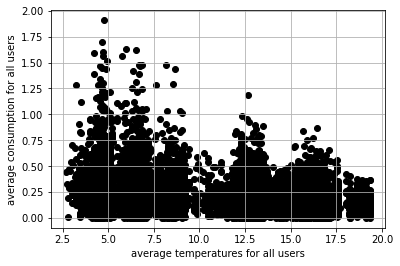

In [17]:
plt.scatter(nptemps,npEn_con, color = 'black')
plt.xlabel("average temperatures for all users")
plt.ylabel("average consumption for all users")
plt.grid()

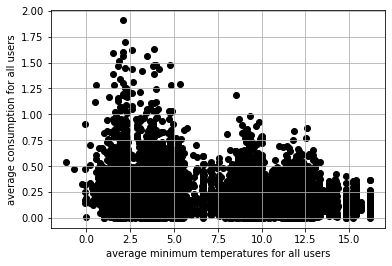

In [18]:
plt.scatter(nptemps_min,npEn_con, color = 'black')
plt.xlabel("average minimum temperatures for all users")
plt.ylabel("average consumption for all users")
plt.grid()

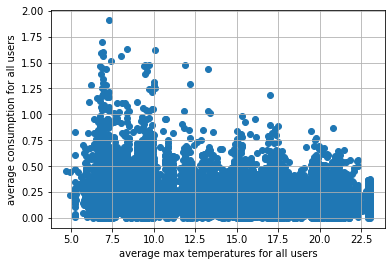

In [19]:
plt.scatter(nptemps_max,npEn_con)
plt.xlabel("average max temperatures for all users")
plt.ylabel("average consumption for all users")
plt.grid()

It's finally time to train the model <br>
from : https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [20]:
# Split the data into training/testing sets
#X_train = nptemps[:-2000] # all elements except last 2000 = 90% training set.
X_train = nptemps[:-6322] #70% trainning set
X_train = X_train.reshape(-1,1)

X_test = nptemps[-6322:] #  last 6322 elements are the test set
X_test = X_test.reshape(-1,1)
                       
X_train_min = nptemps_min[:-6322]
X_train_min = X_train_min.reshape(-1,1)

X_test_min = nptemps_min[-6322:]
X_test_min = X_test_min.reshape(-1,1)

X_train_max = nptemps_max[:-6322]
X_train_max = X_train_max.reshape(-1,1)

X_test_max = nptemps_max[-6322:]
X_test_max = X_test_max.reshape(-1,1)
# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_train = npEn_con[:-6322].reshape(-1,1)

y_test = npEn_con[-6322:]
y_test = y_test.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()
regr_min= linear_model.LinearRegression()
regr_max= linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
regr_min.fit(X_train_min, y_train)
regr_max.fit(X_train_max, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred_min = regr_min.predict(X_test_min)
y_pred_max = regr_max.predict(X_test_max)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
print('Mean squared error min: %.8f'
      % mean_squared_error(y_test, y_pred_min))
print('Mean squared error max: %.8f'
      % mean_squared_error(y_test, y_pred_max))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-0.00831305]]
Mean squared error: 0.02165862
Mean squared error min: 0.02170810
Mean squared error max: 0.02164935
Coefficient of determination: 0.05


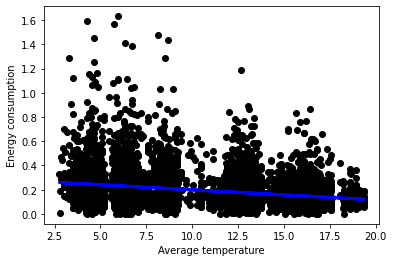

In [21]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel("Average temperature")
plt.ylabel("Energy consumption")


plt.show()

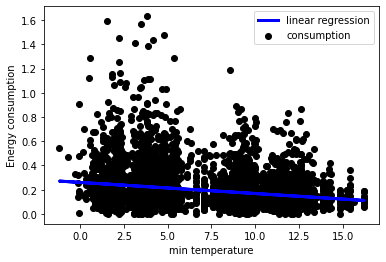

In [22]:
# Plot outputs
plt.scatter(X_test_min, y_test,  color='black', label = "consumption")
plt.plot(X_test_min, y_pred_min, color='blue', linewidth=3, label = "linear regression")
plt.legend()
plt.xlabel("min temperature")
plt.ylabel("Energy consumption")

plt.show()

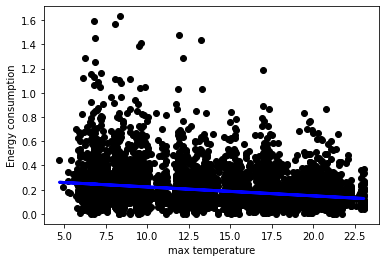

In [23]:
# Plot outputs
plt.scatter(X_test_max, y_test,  color='black')
plt.plot(X_test_max, y_pred_max, color='blue', linewidth=3)
plt.xlabel("max temperature")
plt.ylabel("Energy consumption")



plt.show()

It could be that the prediction on the test set is better than a prediction on for a new data set because there are relativly few values for the temperature in the training/test data

## Combine temps for multi linear model

In [24]:
np_combinedtemps= np.zeros(shape = (len(temps), 3))

for i in range(len(temps)):
    
    np_combinedtemps[i, 0] = temps[i]
    np_combinedtemps[i, 1] = temps_min[i]
    np_combinedtemps[i, 2]  = temps_max[i]

it's training time

In [45]:
# Split the data into training/testing sets
X_train_comb = np_combinedtemps[:-6322]
X_test_comb = np_combinedtemps[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb))

Coefficients: 
 [[-0.00831305]]
Mean squared error: 0.02164496
Coefficient of determination: 0.05


### Question:
What could be done to improve it? Why is it that bad? It almost does not improve with the different models we use.

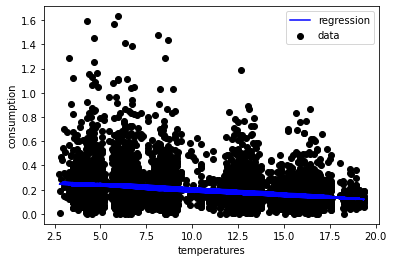

In [53]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black', label ="data")
plt.plot(X_test, y_pred_comb, color='blue',  label = "regression")
plt.legend()
plt.xlabel("temperatures")
plt.ylabel("consumption")
plt.show()

### Including the months in the model's training set:

### Question (TODO):
Which features should we one-hot encode?

In [27]:
np_features= np.zeros(shape = (len(temps), 4))

for i in range(len(temps)):
    
    np_features[i, 0] = temps[i]
    np_features[i, 1] = temps_min[i]
    np_features[i, 2]  = temps_max[i]
    np_features[i, 3]  = month_arr[i]


### Training with temperatures and months as features

In [54]:
# Split the data into training/testing sets
X_train_comb = np_features[:-6322]
X_test_comb = np_features[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)


# The coefficients
print('Coefficients: \n', regr_comb.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb))

Coefficients: 
 [ 0.03033648 -0.01892898 -0.01855107  0.00239188]
Mean squared error: 0.02185707
Coefficient of determination: 0.04


In [75]:
y_pred_comb.shape
np_features[:, 3].shape

(21074,)

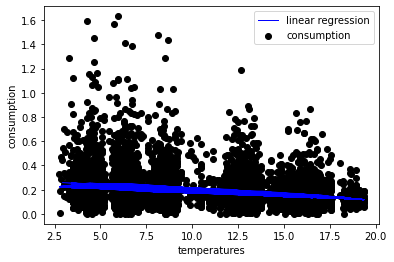

In [76]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black', label = "consumption")
plt.plot(X_test, y_pred_comb, color='blue', linewidth=1, label = "linear regression")
plt.legend()
plt.xlabel("temperatures")
plt.ylabel("consumption")
plt.show()

In [78]:
months_test = npmonth_arr[-6322: ]
months_test.shape

(6322,)

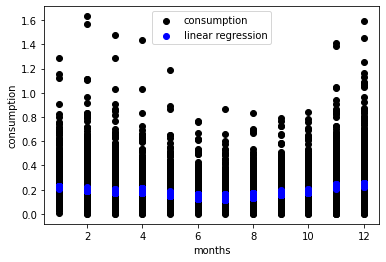

In [83]:
# Plot outputs
plt.scatter(months_test, y_test,  color='black', label = "consumption")
plt.scatter(months_test, y_pred_comb, color='blue', label = "linear regression")
plt.legend()
plt.xlabel("months")
plt.ylabel("consumption")
plt.show()

### Polynomial regression 

In [30]:
train_months=npmonth_arr[:-6322]
print(train_months.shape)
train_months=train_months.reshape(-1, 1)
train_months.shape

(14752,)


(14752, 1)

In [31]:
# Split the data into training/testing sets
X_train_comb = np_features[:-6322]
X_test_comb = np_features[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


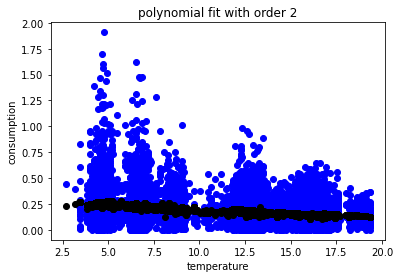

Coefficients: 
 [ 0.00000000e+00  3.31725821e-01 -1.87500184e-01 -1.55793193e-01
 -1.23532130e-02 -1.74015439e-02  4.83795998e-02 -1.85114853e-02
  9.03505755e-04 -2.11992614e-02 -3.94942126e-03  6.73582317e-05
  1.27433111e-02 -7.78005312e-04  1.01614182e-03]
Mean squared error: 0.02180203
Coefficient of determination: 0.04709585


In [32]:
# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_train_comb) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_train_comb))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test_comb))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='blue')
    plt.scatter(X_train, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred_poly))

### Question:

We increase the degree here but the4 MSE gets terribly worse. What might have gone wrong?

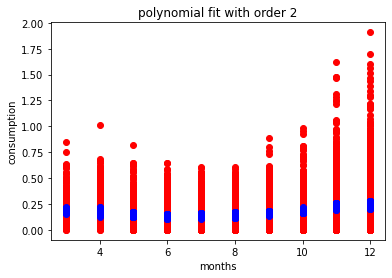

In [33]:
plt.scatter(train_months, y_train, color='red')
plt.scatter(train_months, poly_vals, color='blue')
plt.xlabel('months')
plt.ylabel('consumption')
plt.title("polynomial fit with order " +str(polynom_degree))
plt.show()

In [34]:
brinfo=info_sorted['num_bedrooms']
br_NaNs_number = brinfo.isnull().sum()
print("number of users with+NaN bedroom info = ", brinfo.shape[0])
print("number of users with NaN bedroom info = ", br_NaNs_number)
print("percentage of NaN values in num_bedrooms = ", br_NaNs_number/brinfo.shape[0])
print(np_features.shape)

number of users with+NaN bedroom info =  3248
number of users with NaN bedroom info =  1389
percentage of NaN values in num_bedrooms =  0.42764778325123154
(21074, 4)


#### Question:

Can we train the model with all data while a feaure has less available data without 
having to impute the missing values?

We should use past data in the model.

In [87]:
brinfo[0:1]

meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    2.0
Name: num_bedrooms, dtype: float64

In [35]:
# thresholding the values with NaN values > NaN_t to arrange the bedroom data.
# We discarded the users with threshold < 1200 for the consumption and temperature data.
# We do this as well for the "num_bedrooms" data for consistency.
br_arr = []
NaN_t = 1200

for i in range(df.shape[0]):
    #load rows
    meter=df.iloc[i]
    #row = brinfo_filled[i:i+1]
    row = brinfo[i:i+1]
    
    # loop over all months
    for m in range (1,13):
        begin_index, end_index = get_monthi(m)      #get index of beginning and end of month
        month=meter[begin_index:end_index]
        
        # Check if months have numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        
        if n_NaN<NaN_t:            
            br_arr.append(row[0])

Getting the mean for the training set:

In [90]:
# # Filling the mean value for the NaN values in num_bedrooms column:
# # We should include the mean value of the training data not the whole data.

br_arr_training = br_arr[:-6322]


#convert it to numpy:
npbr_arr_training = np.zeros(len(br_arr_training)) #converting it into numpy array.
for i in range(len(br_arr_training)):
    npbr_arr_training[i] = br_arr[i]
    
#ignore NaN values:
npbr_arr_training_ = npbr_arr_training[np.logical_not(np.isnan(npbr_arr_training))] 
#get the mean of the training data
mean_br_arr_training = npbr_arr_training_.mean()

values = {'num_bedrooms' : mean_br_arr_training}
info_filled_br = info_sorted.fillna(value = values)

info_filled_br

,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,terraced_house,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,3.115156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,3.115156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,3.115156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,3.115156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN,3.115156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xfdaf9f857621ec06f2cf801f42a020a322835090,NaN,NaN,3.115156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,terraced_house,NaN,3.115156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
print(npbr_arr_training.shape)
npEn_con_training = npEn_con[: -6322]
print(npEn_con_training.shape)

(14752,)
(14752,)


Text(0, 0.5, 'energy consumption')

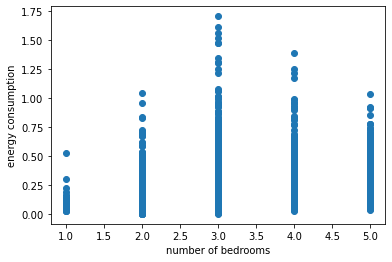

In [94]:
plt.scatter(npbr_arr_training,npEn_con_training)
plt.xlabel("number of bedrooms")
plt.ylabel("energy consumption")

using unkown (as dummy variables).

In [39]:
npbr_arr = np.zeros(len(br_arr)) #converting it into numpy array.

for i in range(len(br_arr)):
    npbr_arr[i] = br_arr[i]

In [105]:
#filling npbr_arr with the mean value of the training data

npbr_arr_filled =np.nan_to_num(npbr_arr, copy=True, nan=mean_br_arr_training, posinf=None, neginf=None)
npbr_arr_filled


array([2.        , 3.11515645, 3.11515645, ..., 3.11515645, 3.11515645,
       3.11515645])

In [109]:
len(br_arr)
len(npbr_arr_filled)

21074

#### Linear and polynomial multivariate regression

In [110]:
combinefeatures=[]
for i in range(len(temps)):
    temp=[]
    temp.append(temps[i])
    temp.append(temps_min[i])
    temp.append(temps_max[i])
    temp.append(month_arr[i])
    #temp.append(br_arr[i])
    temp.append(npbr_arr_filled[i]) #filled with the average of training data.
    combinefeatures.append(temp)
    
npcombinefeatures=np.array(combinefeatures)
npcombinefeatures=npcombinefeatures.reshape(-1,5)

In [111]:
npcombinefeatures.shape

(21074, 5)

In [42]:
brinfo_sorted_dim = npcombinefeatures[:, 4]
brinfo_sorted_dim[:-6322].mean()

nan

In [112]:
#Linear regression: 
# Split the data into training/testing sets
X_train_comb = npcombinefeatures[:-6322]
X_test_comb = npcombinefeatures[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)

# The coefficients
print('Coefficients: \n', regr_comb.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb))

Coefficients: 
 [ 0.02825911 -0.01703729 -0.01819534  0.00225341  0.04821884]
Mean squared error: 0.02132139
Coefficient of determination: 0.07


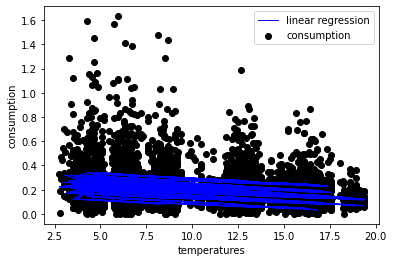

In [113]:
plt.scatter(X_test, y_test,  color='black', label = "consumption")
plt.plot(X_test, y_pred_comb, color='blue', linewidth=1, label = "linear regression")
plt.legend()
plt.xlabel("temperatures")
plt.ylabel("consumption")
plt.show()


In [121]:
test_br = npcombinefeatures[:, 4][-6322:]

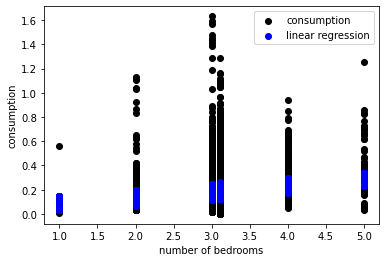

In [123]:
plt.scatter(test_br, y_test,  color='black', label = "consumption")
plt.scatter(test_br, y_pred_comb, color='blue', linewidth=1, label = "linear regression")
plt.legend()
plt.xlabel("number of bedrooms")
plt.ylabel("consumption")
plt.show()

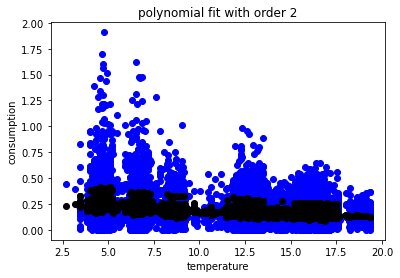

Coefficients: 
 [ 0.00000000e+00  3.08060384e-01 -1.65763384e-01 -1.47943594e-01
 -8.71943865e-03  5.05688946e-03  9.40941734e-03  1.92304377e-02
 -4.34471596e-02 -1.07644707e-03  8.91212108e-03 -1.32380151e-02
  9.49313376e-03  9.37877025e-04 -6.30441891e-03  1.86229115e-02
  3.06656920e-04 -4.53009069e-03  9.33860437e-04 -1.05665587e-03
  1.03002973e-02]
Mean squared error: 0.02123729
Coefficient of determination: 0.07177872


In [124]:
#Polynomial regression:

X_train_comb = npcombinefeatures[:-6322]
X_test_comb = npcombinefeatures[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]



# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_train_comb) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_train_comb))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test_comb))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='blue')
    plt.scatter(X_train, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred_poly))

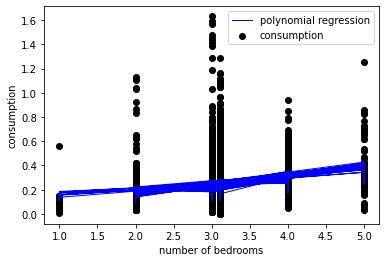

In [125]:
plt.scatter(test_br, y_test,  color='black', label = "consumption")
plt.plot(test_br, y_pred_poly, color='blue', linewidth=1, label = "polynomial regression")
plt.legend()
plt.xlabel("number of bedrooms")
plt.ylabel("consumption")
plt.show()

### Feature scaling

In [126]:
from sklearn import preprocessing
X_train_comb = npcombinefeatures[:-6322]
X_test_comb = npcombinefeatures[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


X_scaled_train = preprocessing.scale(X_train_comb)
X_scaled_test = preprocessing.scale(X_test_comb)

y_scaled_train = preprocessing.scale(y_train)
y_scaled_test = preprocessing.scale(y_test)

In [127]:
#X_train_comb[i][0]    #= average temperature
X_train_comb[:, 0] # = average temperature.
print("non scaled = ", X_train_comb[0][0])
print("non scaled = ", X_train[0][0])
print("scaled = ", X_scaled_train[0][0])
X_scaled_train[:, 0] # = average temperatures scaled.
avg_temps_scaled = X_scaled_train[:, 0] 

non scaled =  meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    4.681048
dtype: float64
non scaled =  4.681048387096775
scaled =  -1.468143153102461


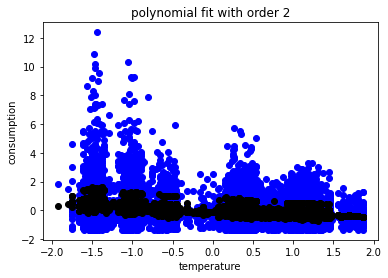

Coefficients: 
 [ 0.          1.67380206 -0.81291086 -1.05525506  0.07927647  0.17111367
  1.3142753   2.39765215 -6.91636519 -0.08335624  0.15047069 -1.47330707
  1.3489614   0.06482832 -0.09501437  3.37875747  0.02706395 -0.08717073
  0.04009122 -0.00989068  0.0210217 ]
Mean squared error: 0.93208184
Coefficient of determination: 0.06791816


In [128]:
#Polynomial regression:

# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_scaled_train) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_scaled_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_scaled_train))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_scaled_test))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(avg_temps_scaled, y_scaled_train, color='blue')
    plt.scatter(avg_temps_scaled, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_scaled_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_scaled_test, y_pred_poly))

Not scaling consumption:

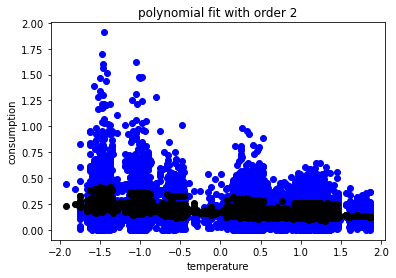

Coefficients: 
 [ 0.          0.23238649 -0.11286251 -0.14650898  0.01100655  0.02375699
  0.1824707   0.33288403 -0.96025086 -0.01157297  0.02089098 -0.20455027
  0.18728643  0.0090006  -0.01319156  0.46909824  0.00375749 -0.01210257
  0.00556616 -0.0013732   0.0029186 ]
Mean squared error: 0.02137328
Coefficient of determination: 0.06583533


In [129]:
#Polynomial regression:

# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_scaled_train) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_scaled_train))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_scaled_test))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(avg_temps_scaled, y_train, color='blue')
    plt.scatter(avg_temps_scaled, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred_poly))

Linear regression with feature scaling

In [130]:
# Create linear regression object
regr_comb_sc = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb_sc.fit(X_scaled_train, y_train)


# Make predictions using the testing set
y_pred_comb_sc = regr_comb_sc.predict(X_scaled_test)

# The coefficients
print('Coefficients: \n', regr_comb_sc.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb_sc))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb_sc))

Coefficients: 
 [ 0.12444392 -0.06697136 -0.09132051  0.00550144  0.02566724]
Mean squared error: 0.02112959
Coefficient of determination: 0.08


Note: I think there is something wrong with either the linear or the polynomial models, because when I use degree = 1 in the polynomial model, poly and linear models give different results. Or maybe because of the feature fitting they result in different values?

### TODO: 

https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features